In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import random
import string
import hashlib
import json


#Loading data
columns_name = ['id', 'date', 'latitude', 'longitude' ]
df = pd.read_csv('database', names = columns_name, sep = '\t')
df['date'] = df['date'].str.slice(stop = 16)
df['date'] = pd.to_datetime(df['date'], format = "%Y-%m-%d %H:%M")

df['week'] = df['date'].dt.isocalendar().week


In [2]:
file_name = 'DAZC_467'
anon = pd.read_csv('./files/'+file_name, names = columns_name, sep = '\t')
anon = anon.loc[anon.id != 'DEL']
anon['date'] = anon['date'].str.slice(stop = 16)
anon['date'] = pd.to_datetime(anon['date'], format = "%Y-%m-%d %H:%M")
anon['week'] = anon['date'].dt.isocalendar().week
anon.latitude = anon.latitude.astype(float)
anon.longitude = anon.longitude.astype(float)
print(anon.head())

          id                date  latitude  longitude  week
0  1\Fd[IkzV 2015-05-12 20:27:00      4.87      45.70    20
2  @x_Ce3?6+ 2015-04-22 21:56:00      4.84      45.80    17
3  xvC|Ak;{^ 2015-03-09 08:50:00      4.77      45.99    11
4  1\Fd[IkzV 2015-05-11 17:45:00      4.87      45.70    20
5  =o,KR|a*) 2015-04-11 00:48:00      4.84      45.80    15


In [3]:
id_week_anon = anon.groupby('id')['week'].unique()
#print(id_week_anon)

list_id_anon = anon["id"].unique()
print(len(list_id_anon))
list_id_ori = df["id"].unique()
#print(list_id_ori)
id_week_ori = df.groupby('id')['week'].unique()
#print(id_week_ori[1])

#anon['latitude'] = anon['latitude'].round(decimals=2)    
#anon['longitude'] = anon['longitude'].round(decimals=2)

print(anon.shape)

449
(29754953, 5)


In [5]:
#Group id-week-moyen_latitude-moyen_longitude

mean_lat_ori = df.groupby(['id','week'])['latitude'].mean()
mean_long_ori = df.groupby(['id','week'])['longitude'].mean()
#mean_date_ori = df.groupby(['id','week'])['date'].mean()

ori_mean = df[['id','week']].drop_duplicates().reset_index(drop=True)
ori_mean['mean_latitude'] = ori_mean.apply(lambda x: mean_lat_ori[x.id][x.week], axis=1)
ori_mean['mean_longitude'] = ori_mean.apply(lambda x: mean_long_ori[x.id][x.week], axis=1)
#ori_mean['mean_date'] = ori_mean.apply(lambda x: mean_date_ori[x.id][x.week], axis=1)

mean_lat_anon = anon.groupby(['id','week'])['latitude'].mean()
mean_long_anon = anon.groupby(['id','week'])['longitude'].mean()
#mean_date_anon = anon.groupby(['id','week'])['date'].mean()

anon_mean = anon[['id','week']].drop_duplicates().reset_index(drop=True)
anon_mean['mean_latitude'] = anon_mean.apply(lambda x: mean_lat_anon[x.id][x.week], axis=1)
anon_mean['mean_longitude'] = anon_mean.apply(lambda x: mean_long_anon[x.id][x.week], axis=1)
#anon_mean['mean_date'] = anon_mean.apply(lambda x: mean_date_anon[x.id][x.week], axis=1)

#print(anon_mean)

ori_mean['new_id'] = ori_mean['id']

In [ ]:
for i in list_id_ori:
    for w in id_week_ori[i]:
        list_distance = list()
        mean_lat = ori_mean.loc[(ori_mean.id == i)&(ori_mean.week ==w),'mean_latitude'].to_list()[0]
        mean_long = ori_mean.loc[(ori_mean.id == i)&(ori_mean.week ==w),'mean_longitude'].to_list()[0]
        #mean_date = ori_mean.loc[(ori_mean.id == i)&(ori_mean.week ==w),'mean_date'].to_list()[0]
        for j in range(len(anon_mean)):
            distance = (anon_mean.mean_latitude[j] - mean_lat)**2 + (anon_mean.mean_longitude[j] - mean_long)**2
            #delta_time = np.power(abs((anon_mean.mean_date[j] - mean_date).total_seconds() / 3600), 1/4)
            #distance = np.sqrt((anon.loc[anon.id == anon_mean.id[j],'latitude'] - mean_lat)**2 + (anon.loc[anon.id == anon_mean.id[j],'longitude'] - mean_long)**2).sum()
            list_distance.append(distance)
            
        index = list_distance.index(min(list_distance))
        l = id_week_anon[anon_mean.id[index]]# list of week have id anon_mean.id[index]
        print(l)
        #while (w != anon_mean.week[index]):
         #   list_distance[index] = 1000
          #  index = list_distance.index(min(list_distance))
        while (w not in l):
            list_distance[index] = 1000
            index = list_distance.index(min(list_distance))
            l = id_week_anon[anon_mean.id[index]]
        #if (w == anon_mean.week[index]):
        if (w in l):
            ori_mean.loc[(ori_mean.id == i)&(ori_mean.week ==w),'new_id'] = anon_mean.id[index]
        
print(ori_mean.head())

data = {}
count2 = 0
for i in list_id_ori:
    data[str(i)] = {}
    for w in id_week_ori[i]:
        data[str(i)]['2015'+'-'+str(w)] = [str(ori_mean.loc[(ori_mean.id == i)&(ori_mean.week ==w),'new_id'][count2])]
        count2 +=1
with open('attack_'+file_name, 'w') as fp:
    json.dump(data, fp, indent=1)

<IntegerArray>
[10]
Length: 1, dtype: UInt32
<IntegerArray>
[19]
Length: 1, dtype: UInt32
<IntegerArray>
[12]
Length: 1, dtype: UInt32
<IntegerArray>
[11]
Length: 1, dtype: UInt32
<IntegerArray>
[19]
Length: 1, dtype: UInt32
<IntegerArray>
[15]
Length: 1, dtype: UInt32
<IntegerArray>
[15]
Length: 1, dtype: UInt32


In [179]:
ori_mean.new_id.nunique()

223

In [175]:
print(ori_mean.new_id.nunique())

data['73']['2015-14'] = ["641"]
print(data['110']['2015-10'])
with open('attack_'+file_name, 'w') as fp:
    json.dump(data, fp, indent=1)


99
['674']


In [172]:
nega_lat = anon.loc[anon['latitude'] < 0].groupby(['id','week'])['latitude'].mean()#agg(pd.Series.mode)
nega_lat = nega_lat
print(nega_lat)
print(len(nega_lat))

id   week
570  15     -97.742525
571  16     -97.715153
573  11      -0.616942
     18      -1.960941
575  10      -0.560009
     13      -0.578333
     20      -5.450000
576  11      -0.573530
577  10      -0.567494
578  10      -0.593770
     16      -1.250000
     20     -17.478964
579  10      -0.579480
     11      -0.570000
580  10      -0.570074
581  10      -0.569982
585  10      -0.584903
586  11      -0.570042
587  10      -0.570001
589  10      -0.570011
592  14      -1.617716
595  17      -0.570000
597  12      -1.042959
     19      -0.570070
598  13      -1.120065
599  14      -0.949092
606  10     -46.860000
615  11      -5.750000
620  15      -1.670000
627  14     -32.654000
631  15      -6.370990
     18      -3.855000
632  16      -6.280000
637  10      -0.549250
638  11      -1.590538
639  12      -0.930000
640  13      -0.801075
641  14      -1.620000
674  10      -1.670000
Name: latitude, dtype: float64
39


In [174]:
cop = df.copy()
cop.latitude = cop.latitude.round(decimals = 2)
cop.longitude = cop.longitude.round(decimals = 2)
nega_lat = cop.loc[cop['latitude'] < 0].groupby(['id','week'])['latitude'].mean()#agg(pd.Series.mode)

print(nega_lat)
print(len(nega_lat))

id   week
1    15     -97.749181
     16     -97.688264
     18      -1.799510
     20      -5.450000
4    20     -17.455300
8    11      -0.625500
     13      -0.578453
     16      -1.250000
11   10      -0.562925
     11      -0.574992
13   10      -0.569631
14   10      -0.579282
     11      -0.570000
15   10      -0.571862
16   10      -0.570074
17   10      -0.574754
     11      -0.579809
21   10      -0.583912
     11      -0.570300
23   10      -0.571103
24   14      -1.644043
     15      -1.656402
     17      -0.570000
     19      -0.570370
25   10      -0.571374
31   12      -1.067127
     13      -1.123497
     14      -0.997812
42   10     -46.860000
50   11      -5.750000
51   15      -1.670000
59   14     -32.920000
     18      -3.857500
62   15      -6.271600
     16      -6.267187
73   10      -0.567731
     11      -0.603293
     12      -0.685808
     13      -0.765954
     14      -1.611044
     15      -1.610000
     17      -1.610000
110  10      -1.670000
N

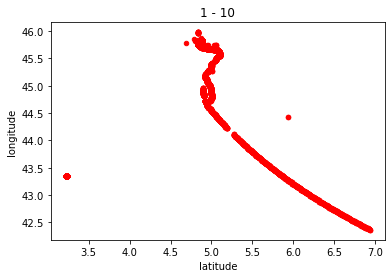

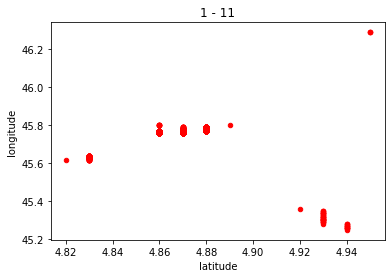

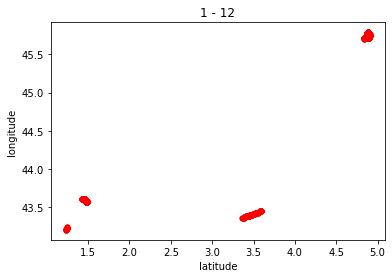

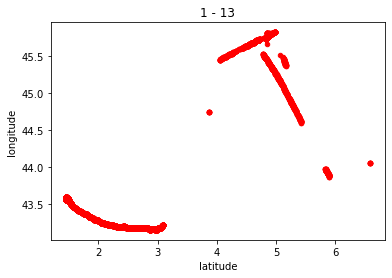

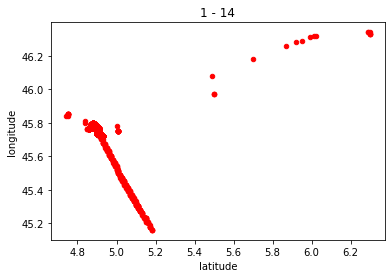

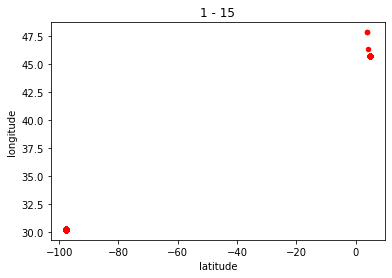

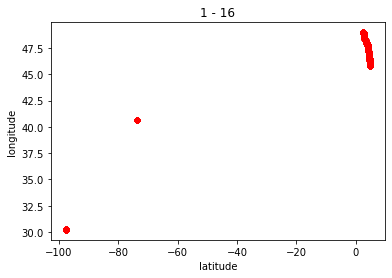

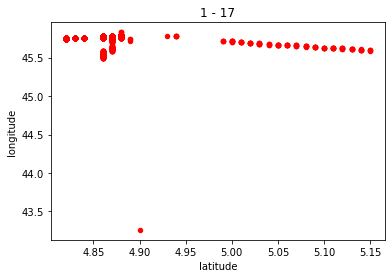

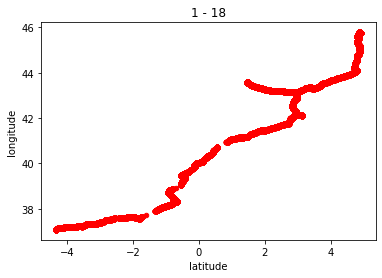

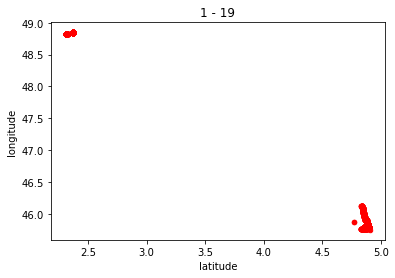

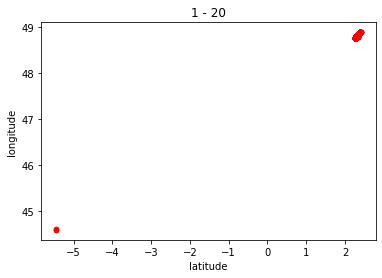

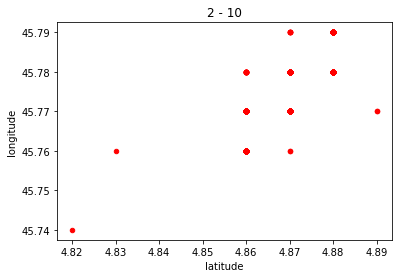

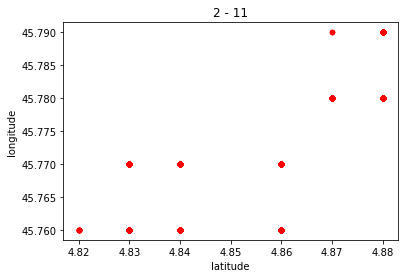

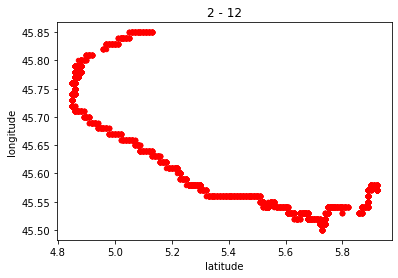

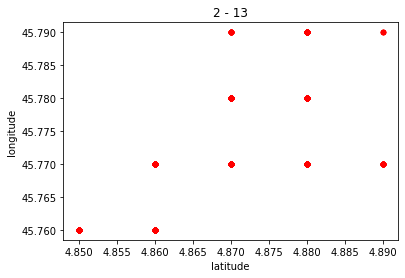

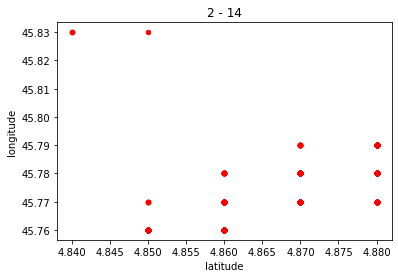

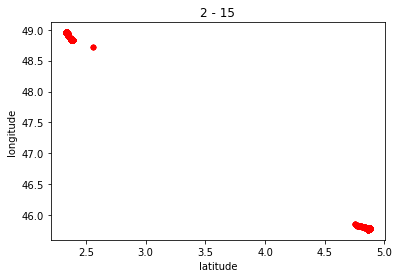

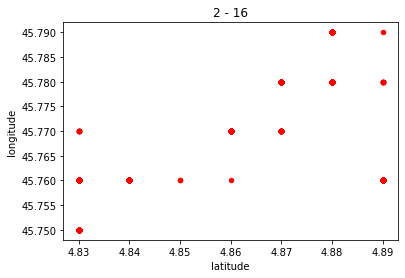

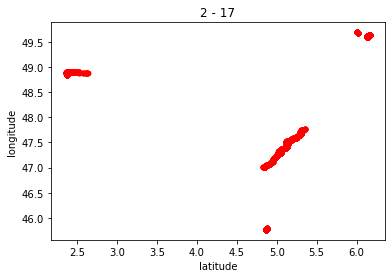

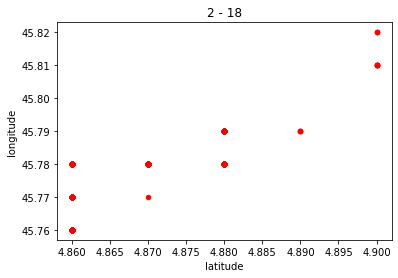

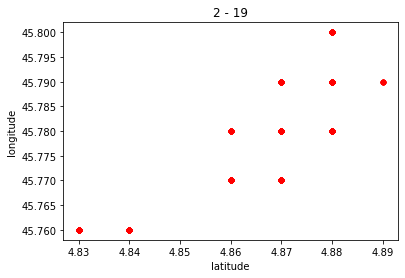

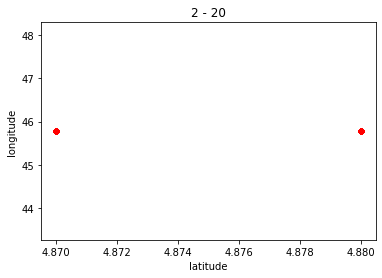

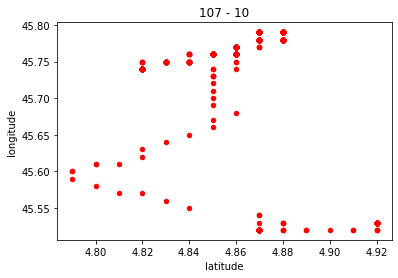

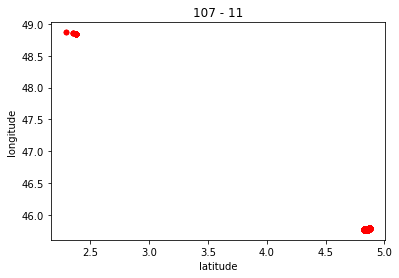

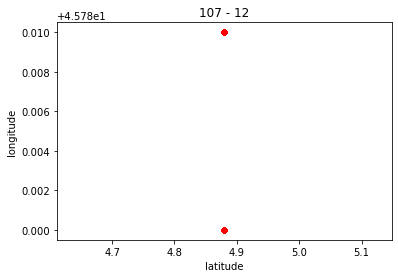

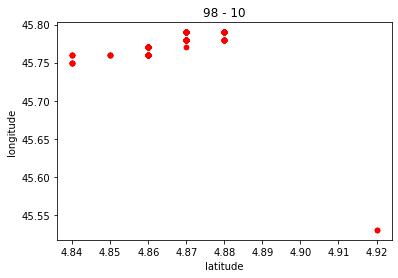

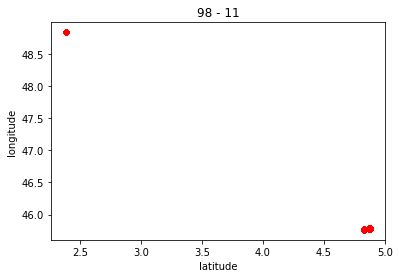

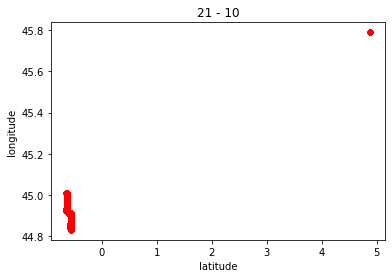

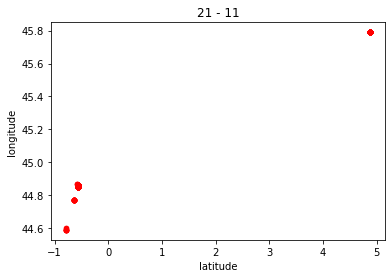

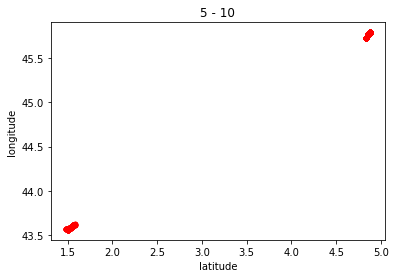

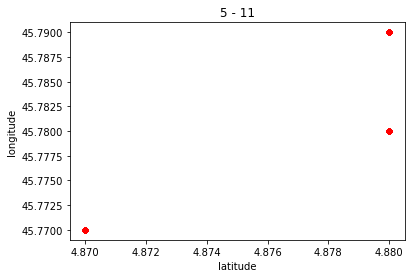

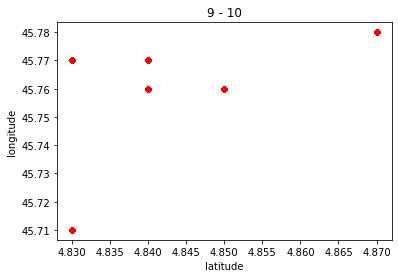

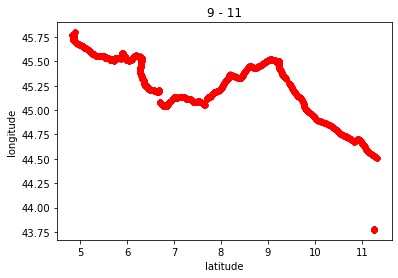

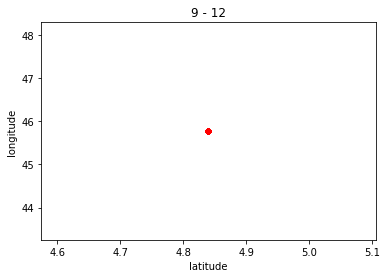

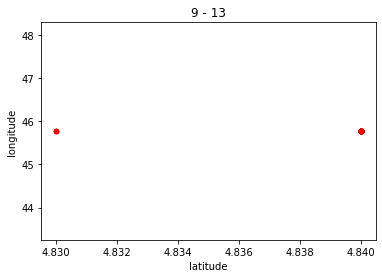

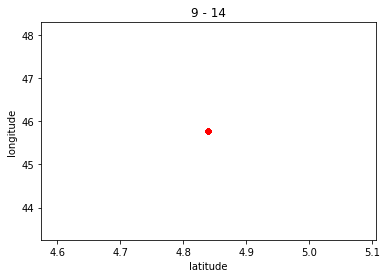

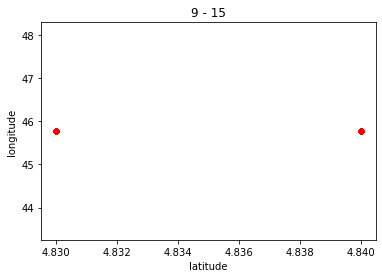

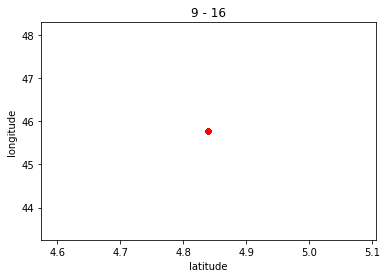

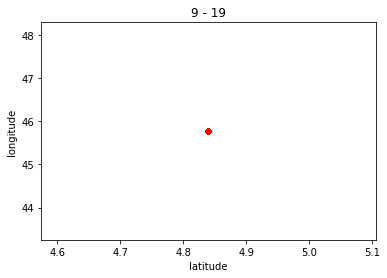

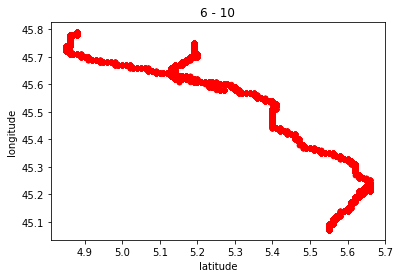

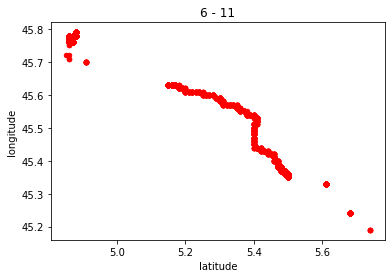

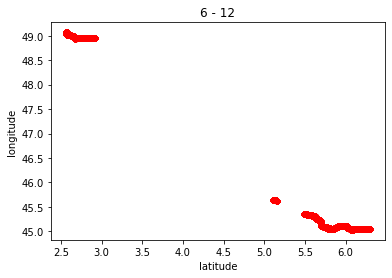

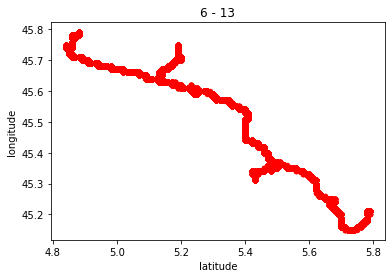

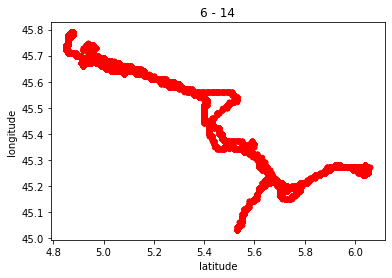

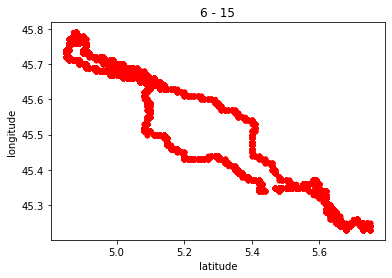

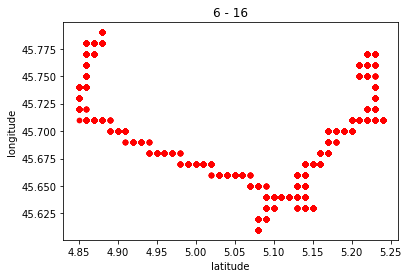

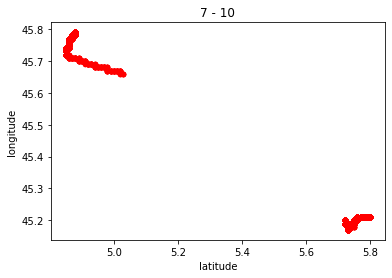

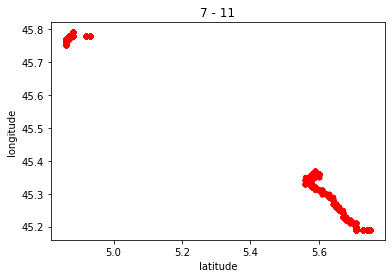

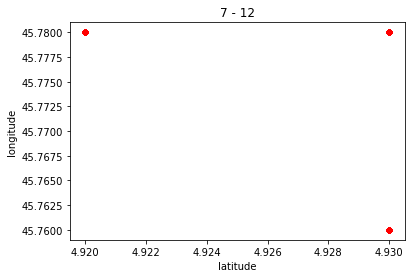

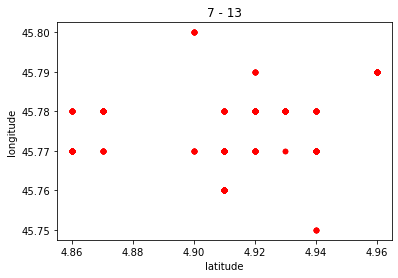

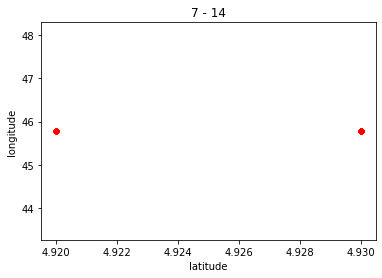

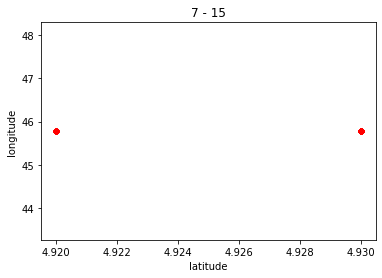

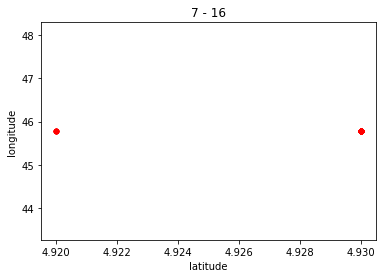

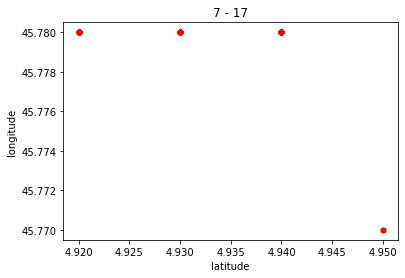

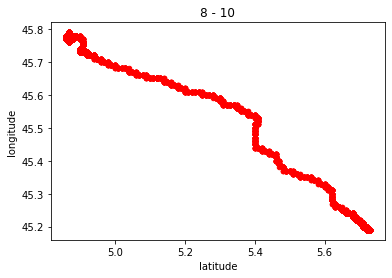

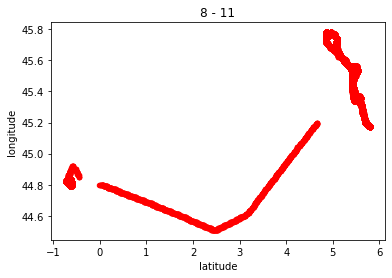

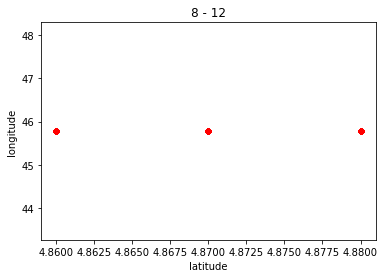

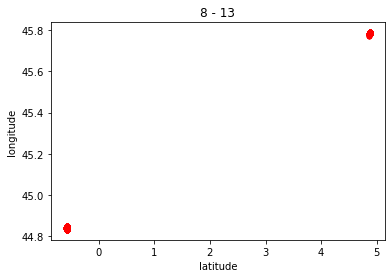

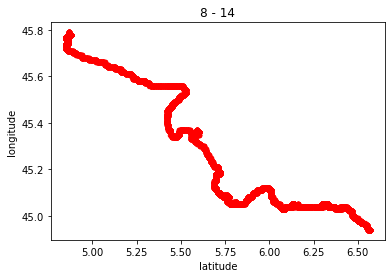

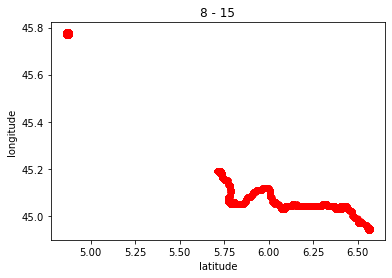

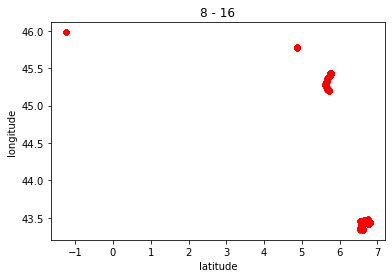

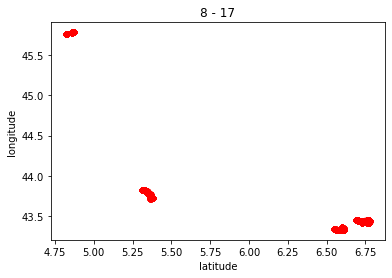

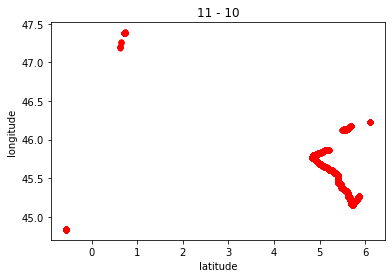

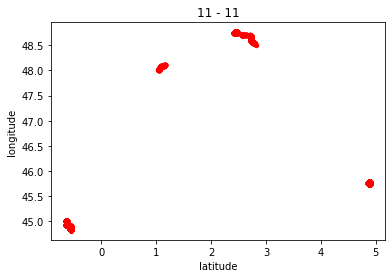

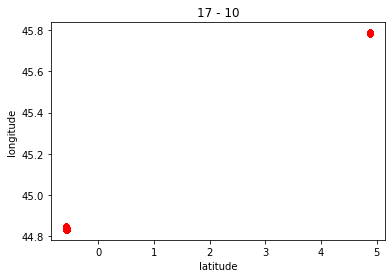

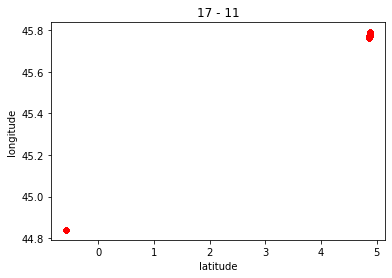

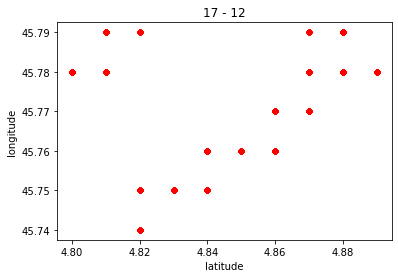

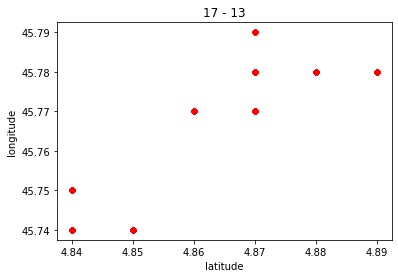

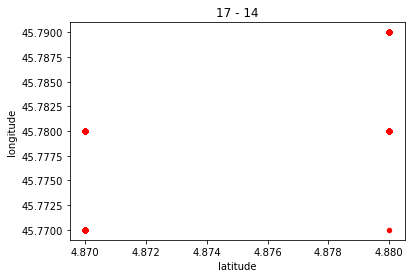

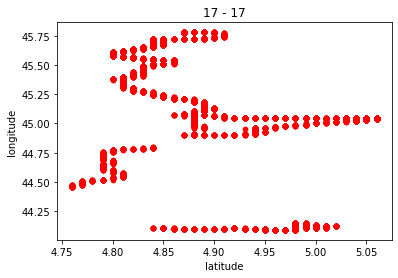

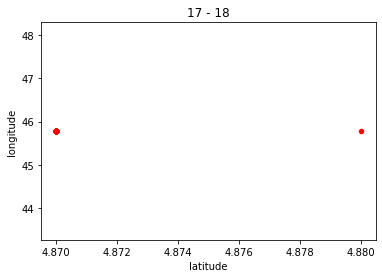

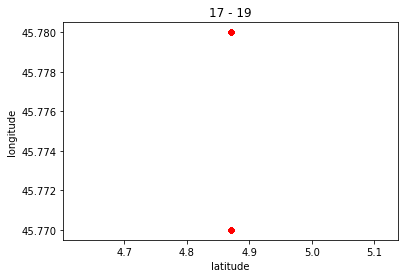

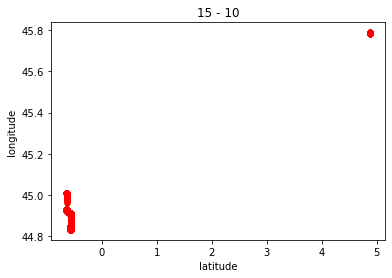

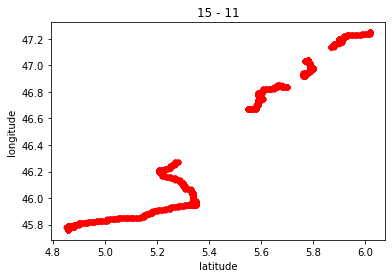

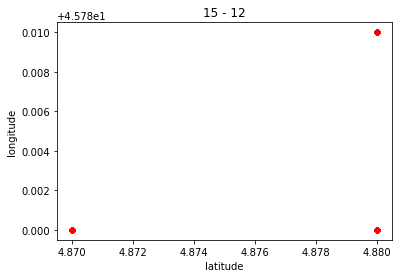

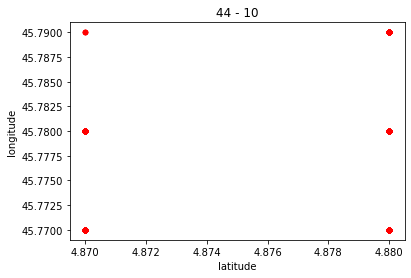

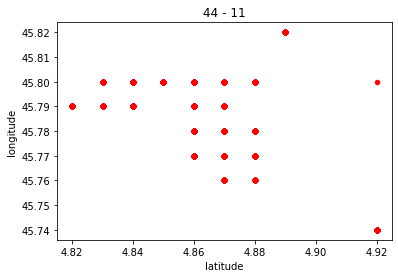

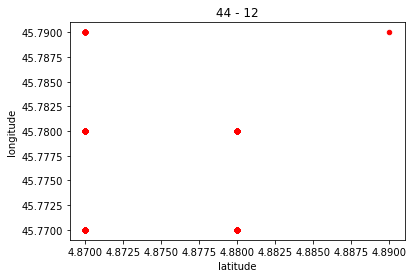

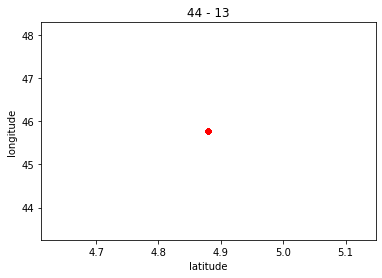

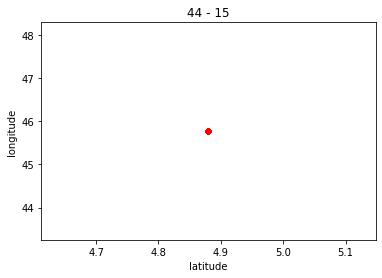

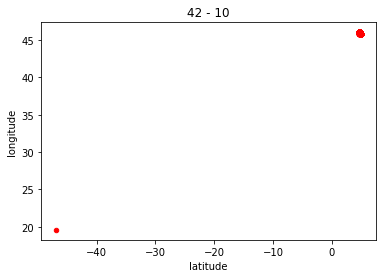

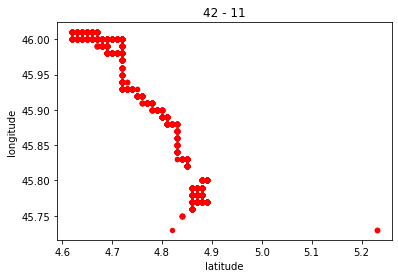

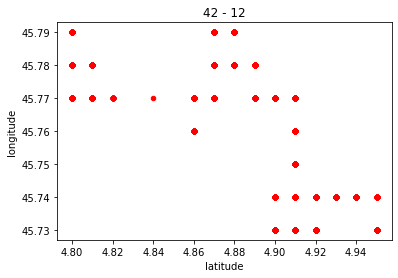

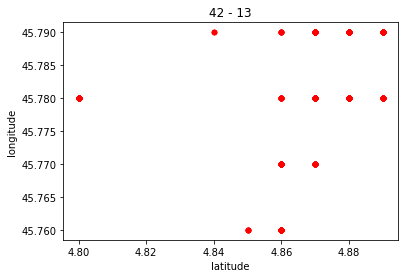

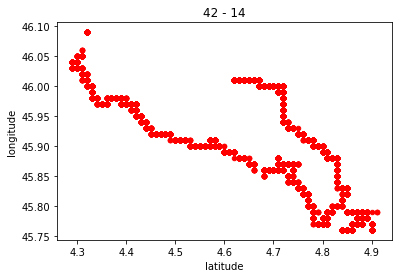

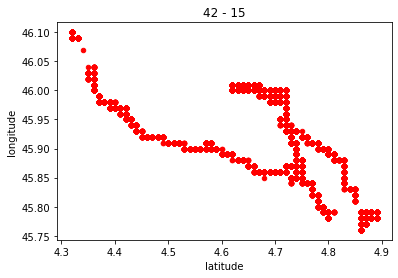

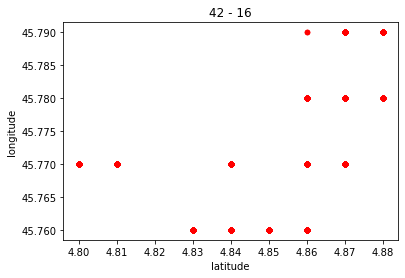

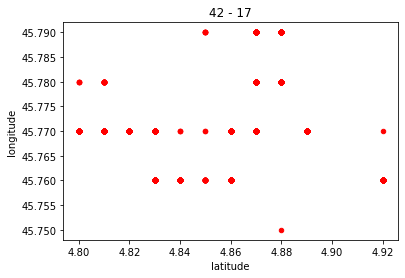

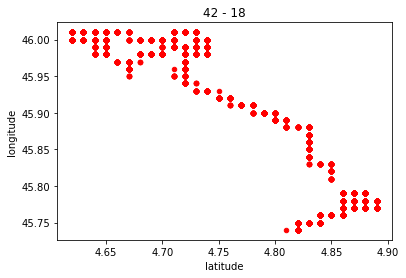

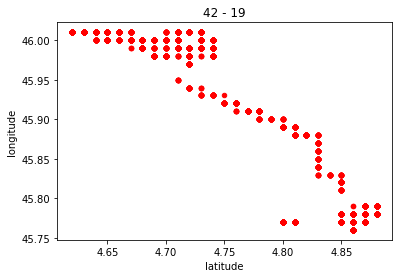

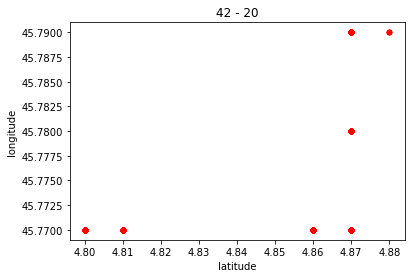

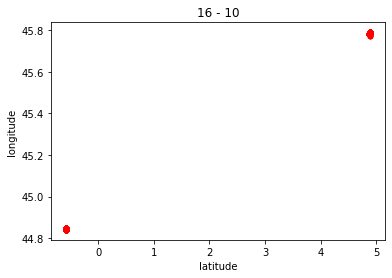

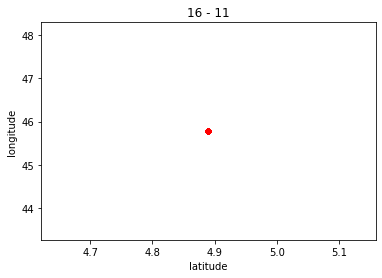

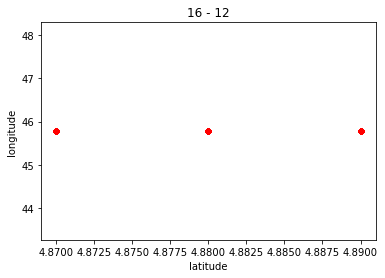

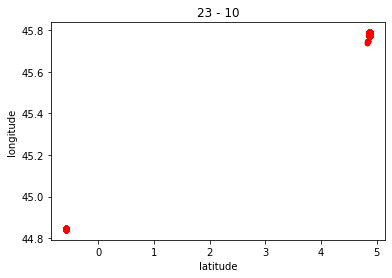

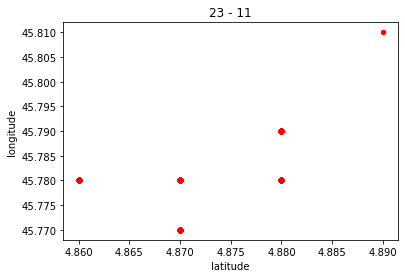

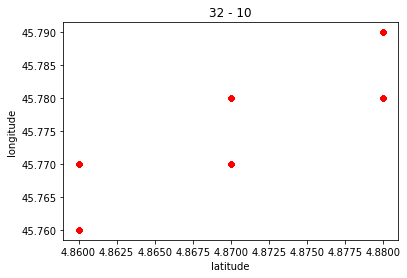

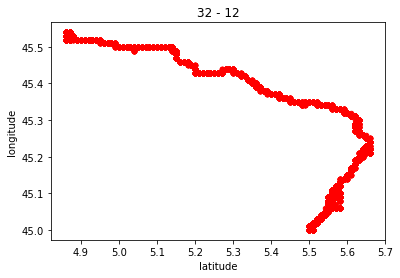

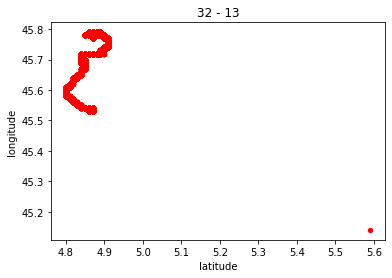

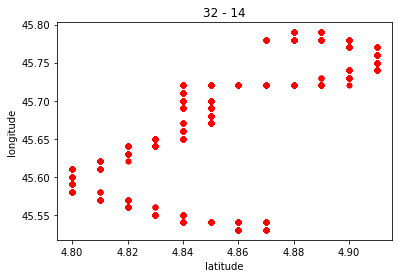

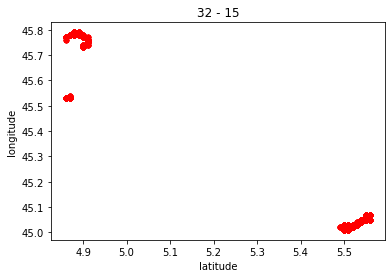

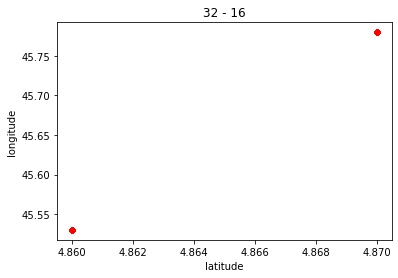

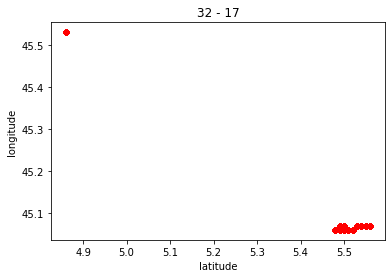

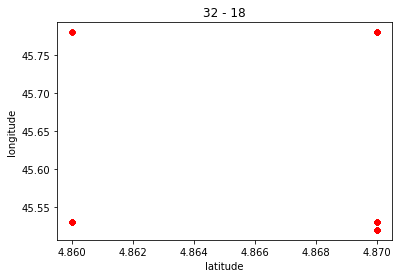

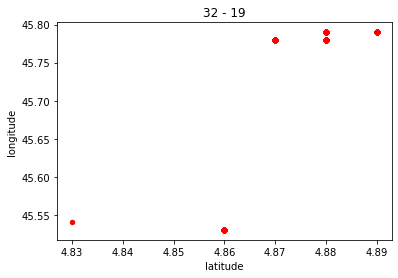

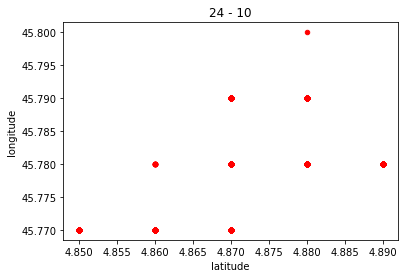

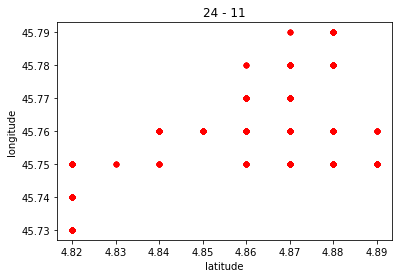

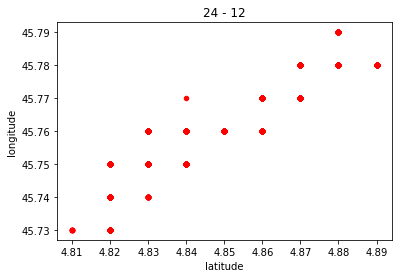

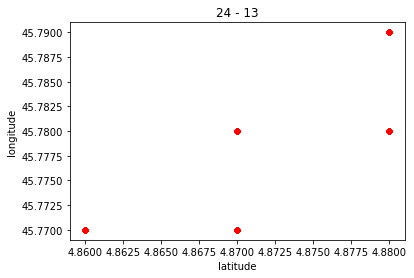

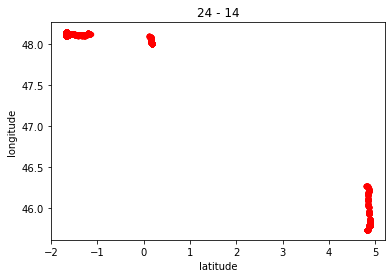

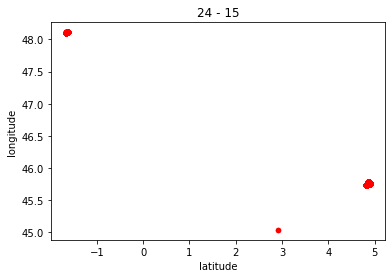

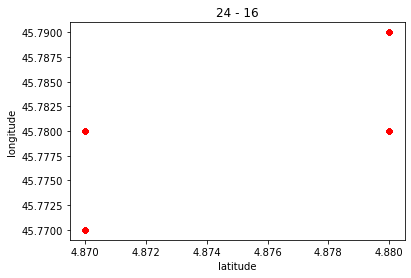

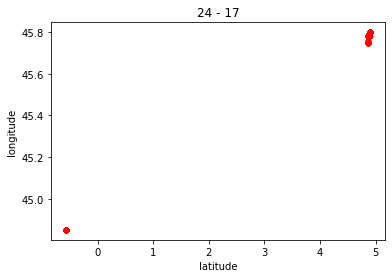

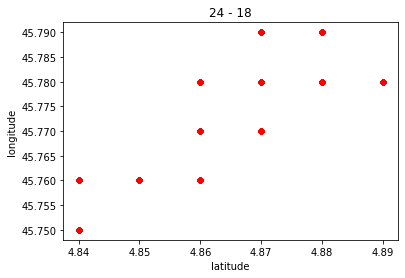

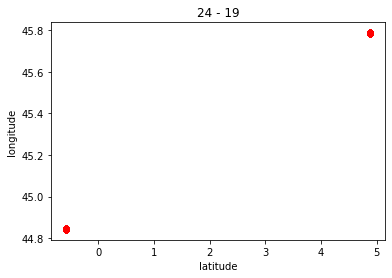

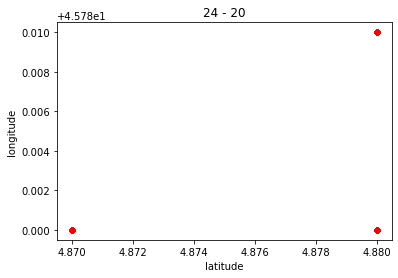

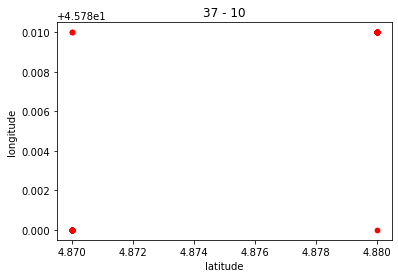

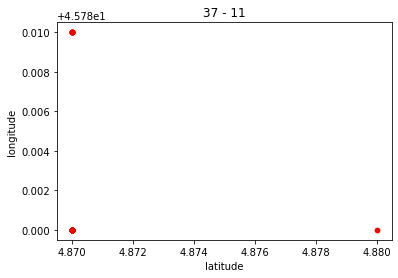

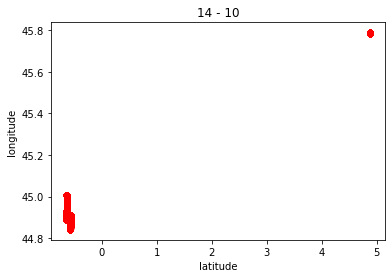

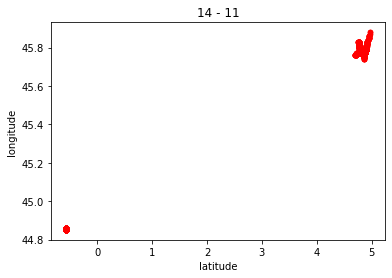

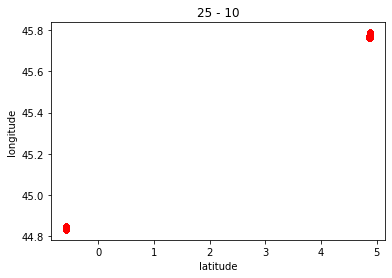

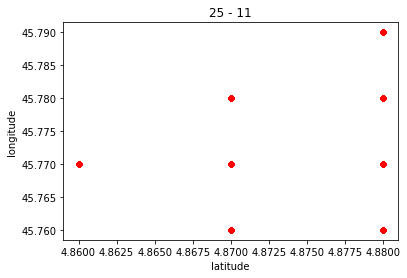

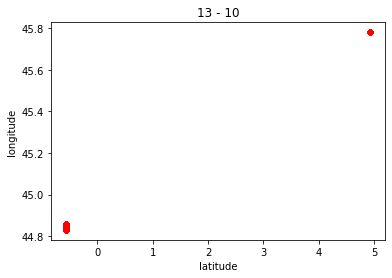

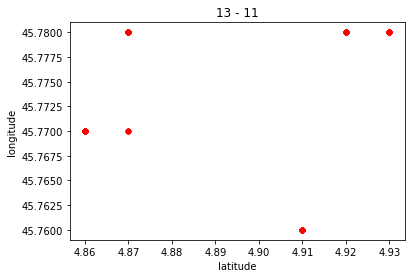

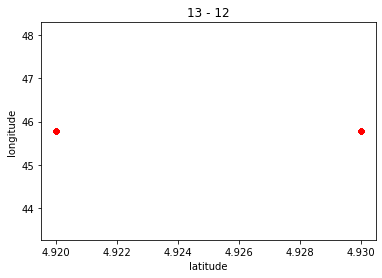

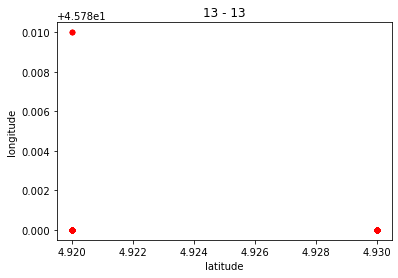

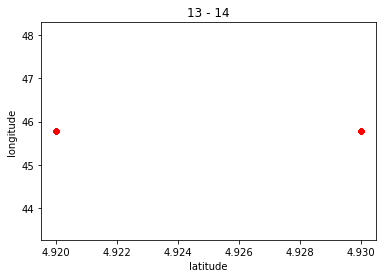

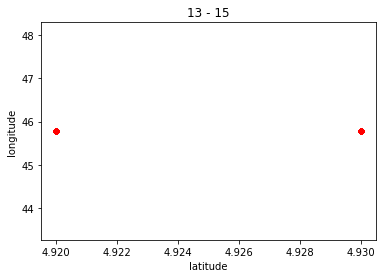

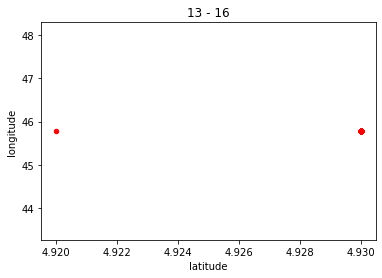

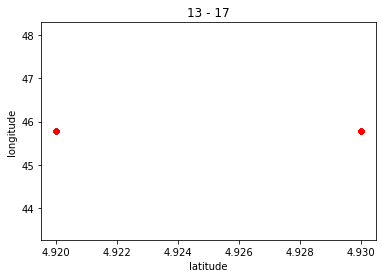

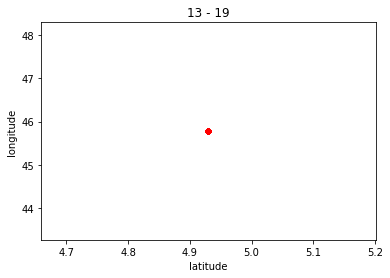

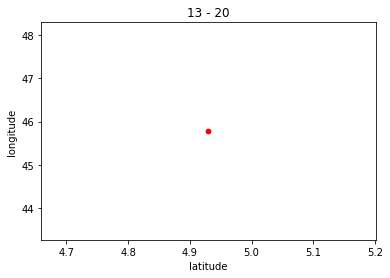

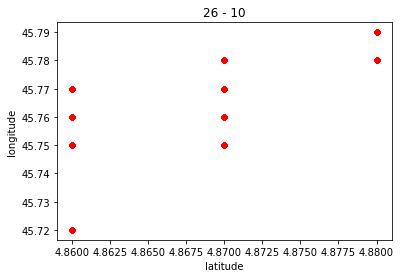

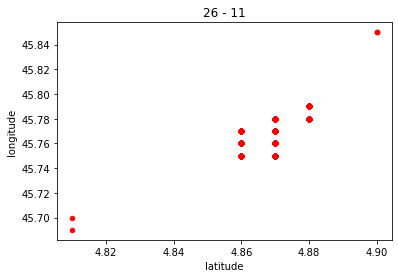

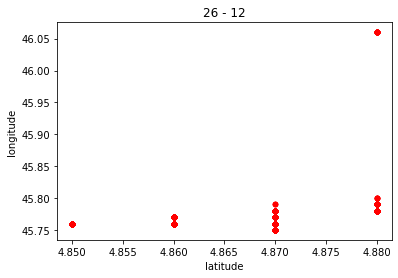

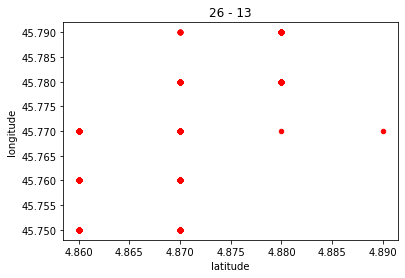

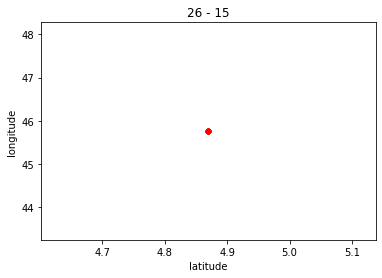

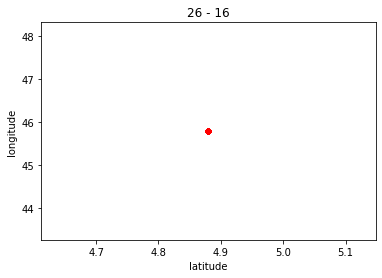

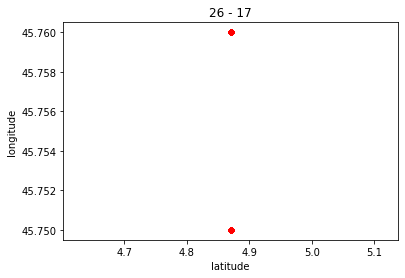

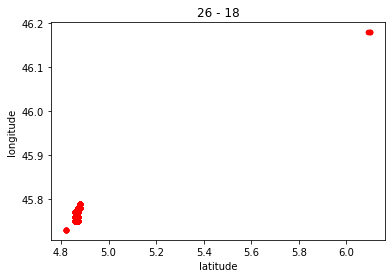

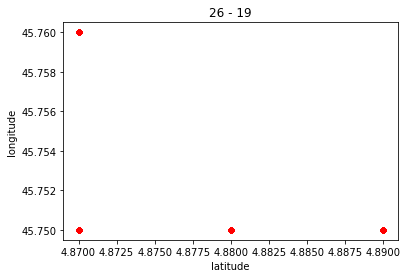

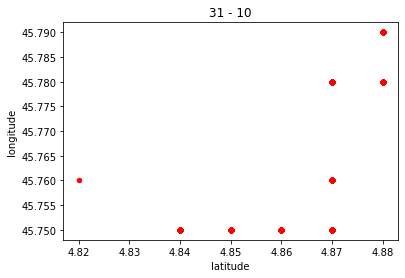

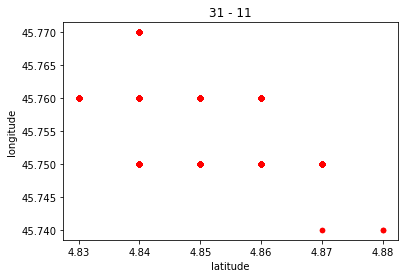

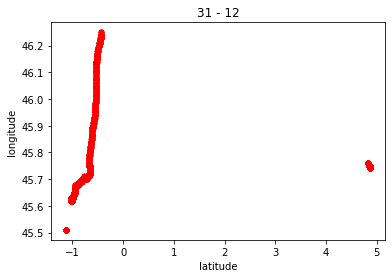

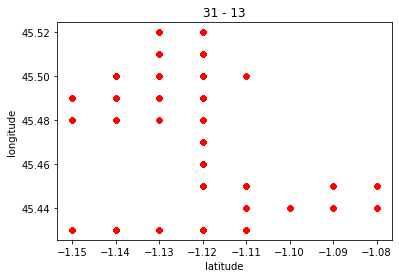

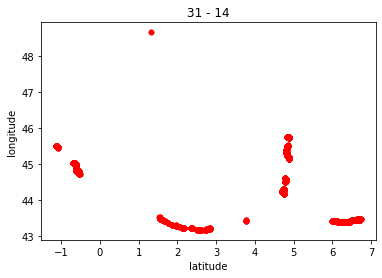

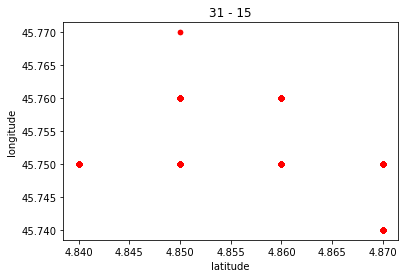

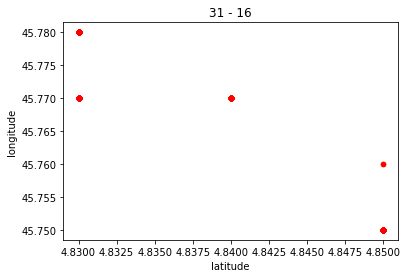

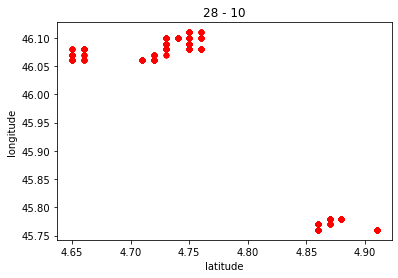

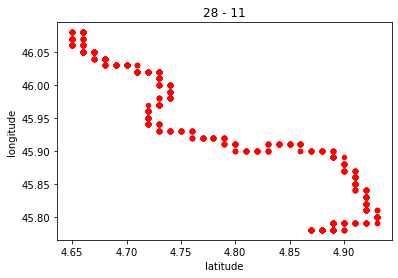

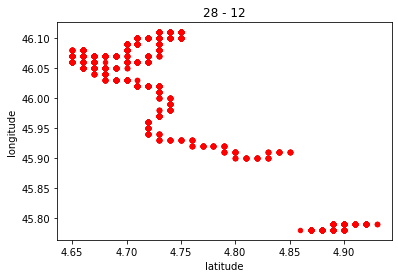

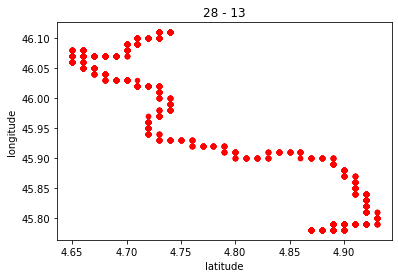

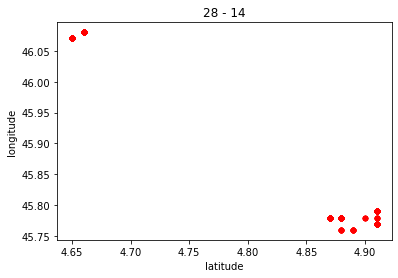

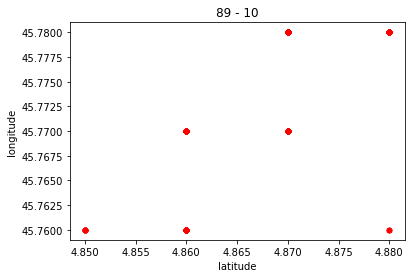

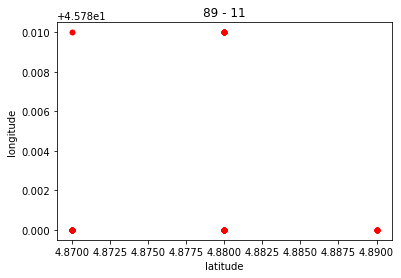

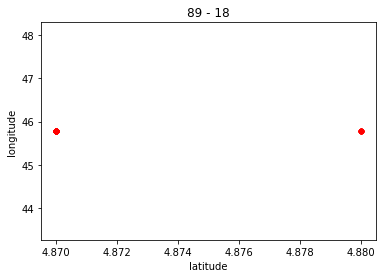

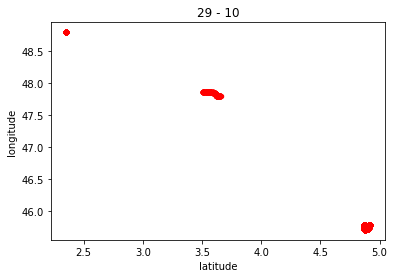

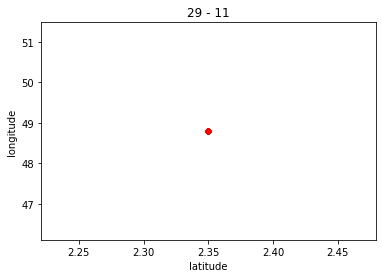

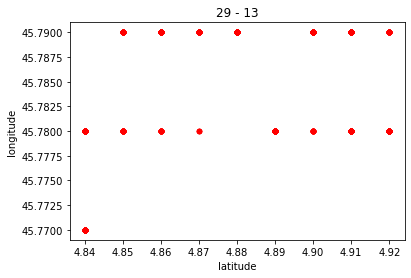

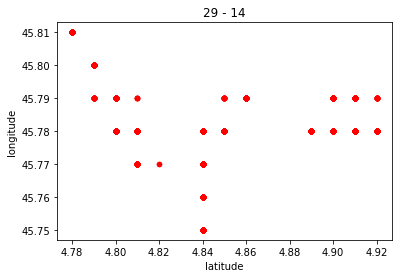

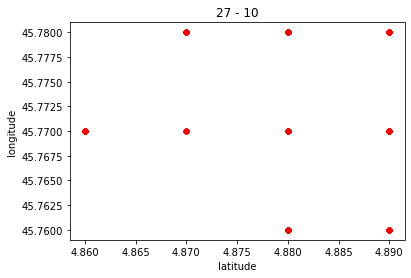

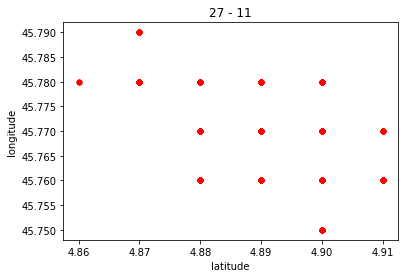

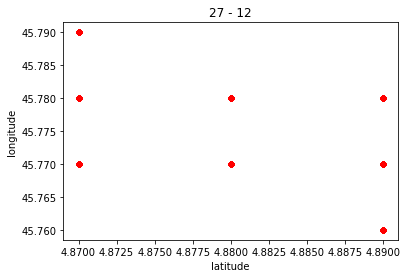

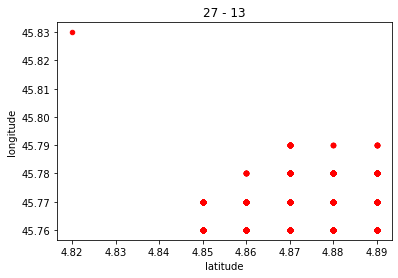

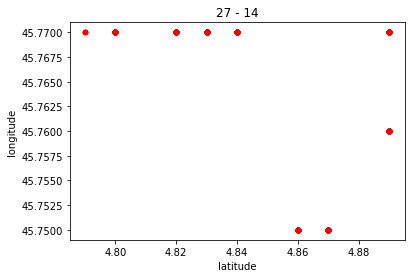

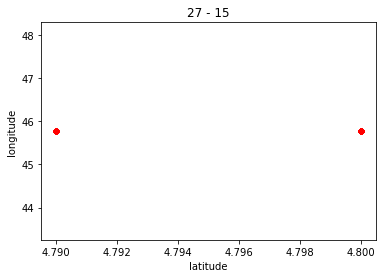

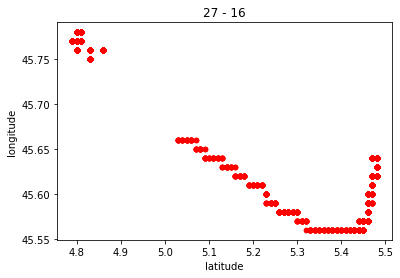

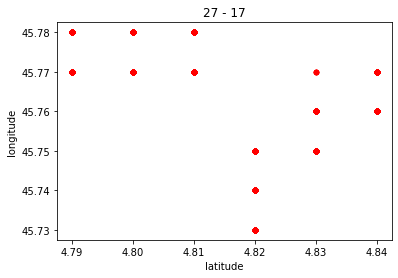

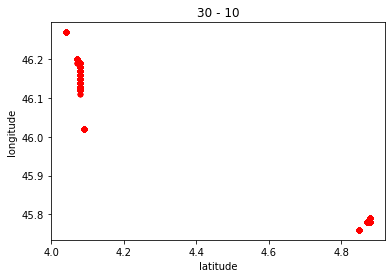

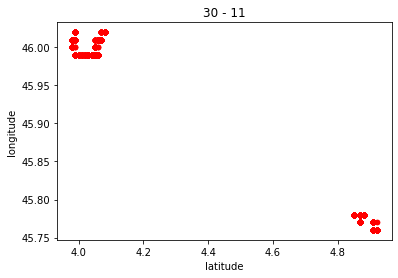

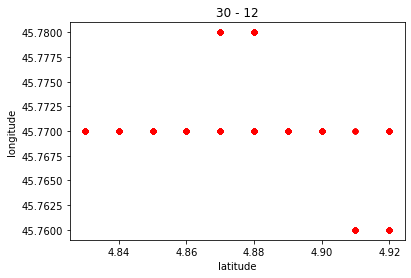

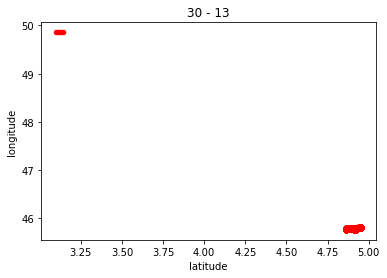

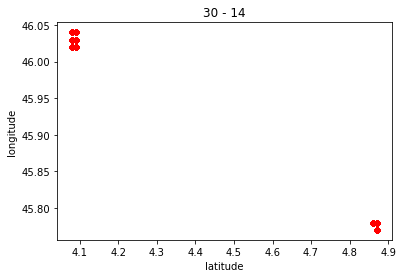

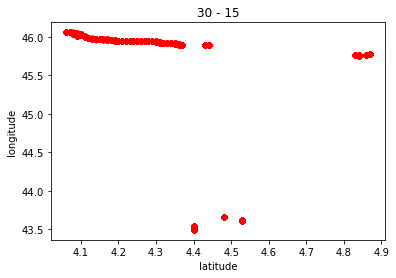

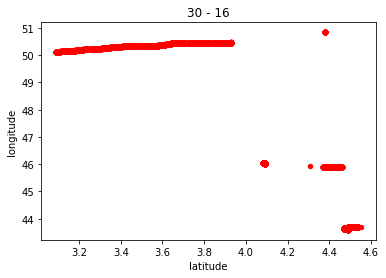

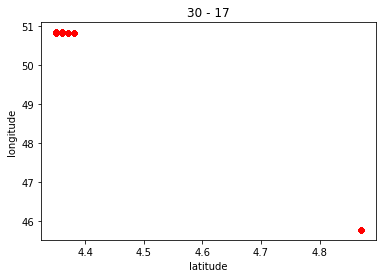

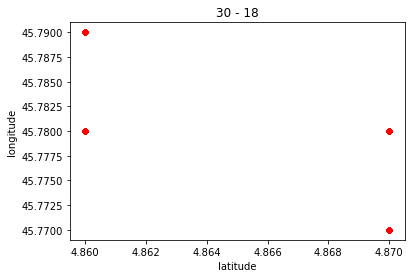

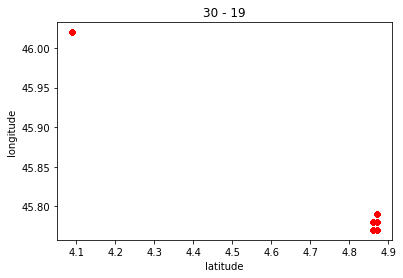

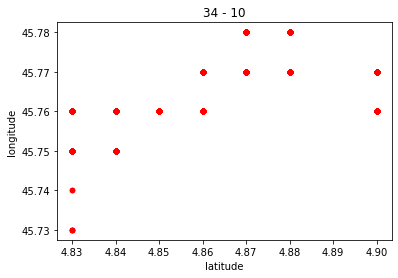

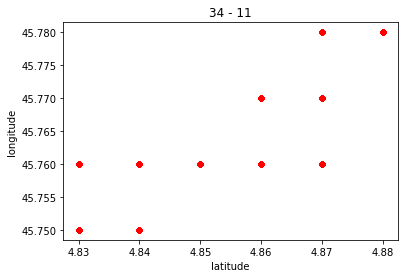

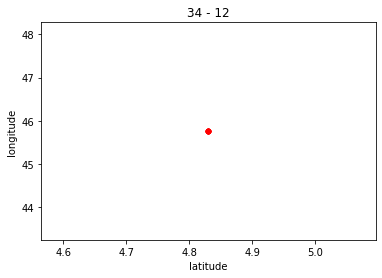

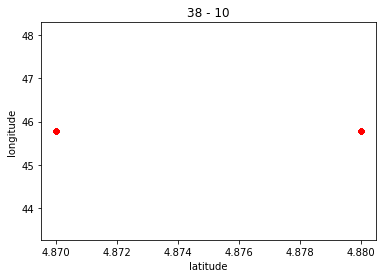

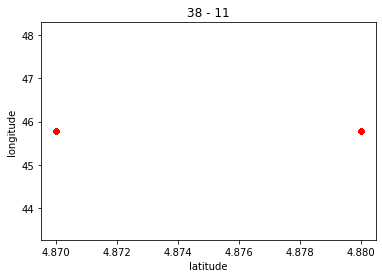

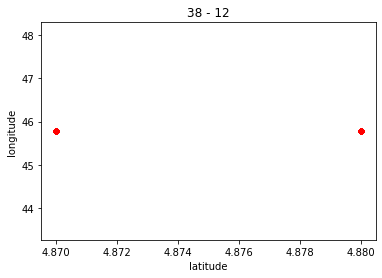

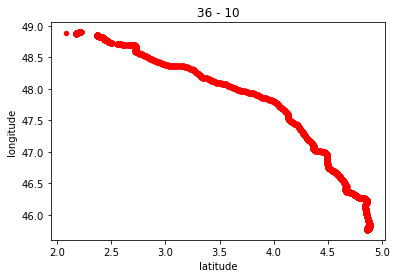

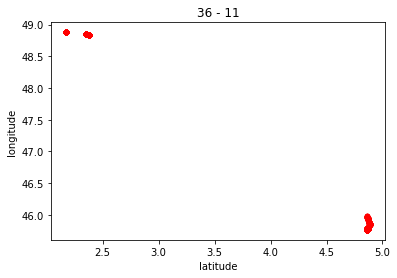

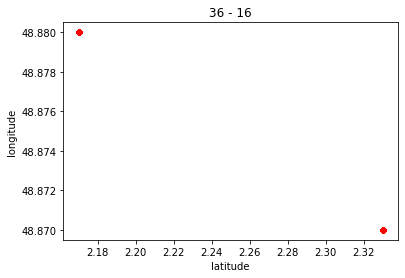

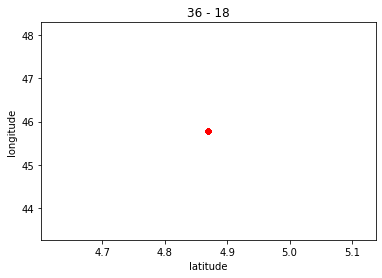

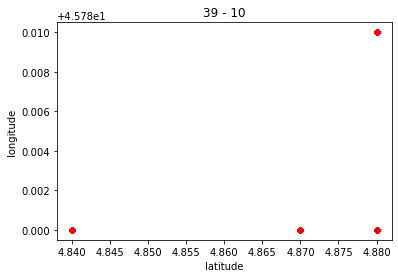

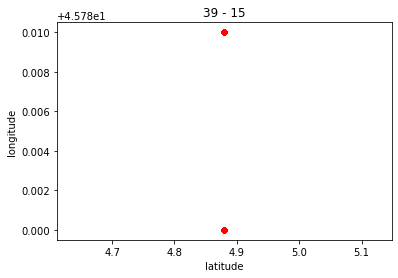

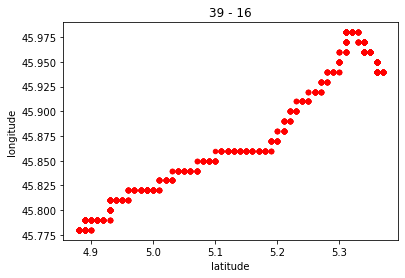

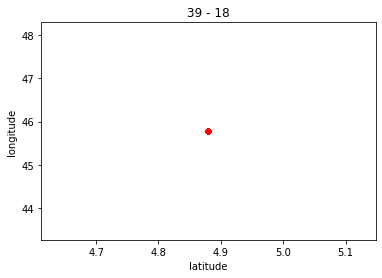

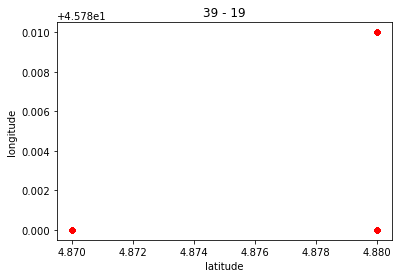

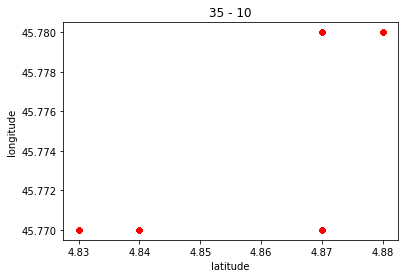

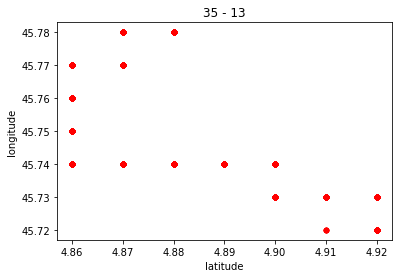

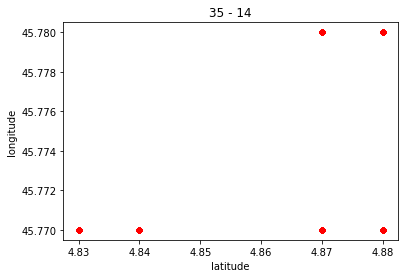

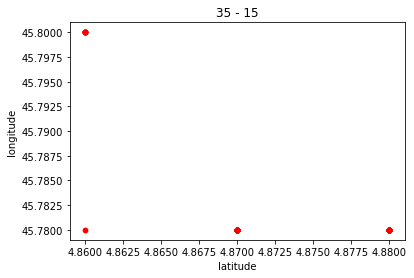

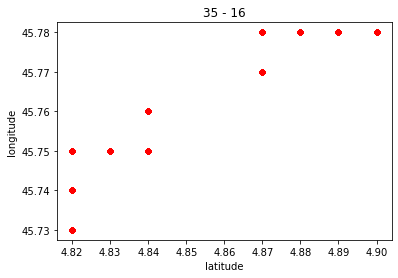

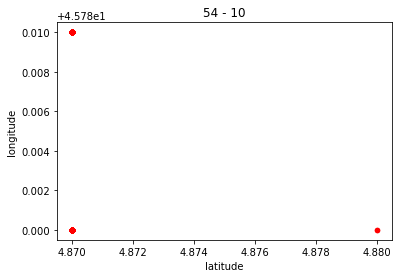

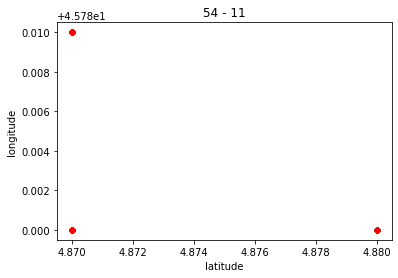

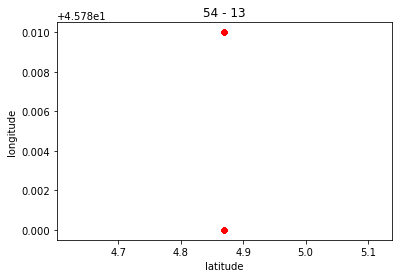

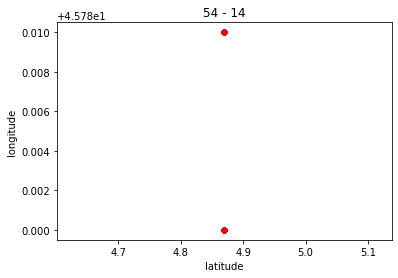

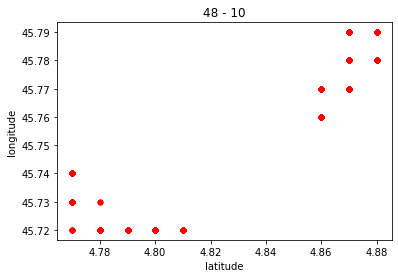

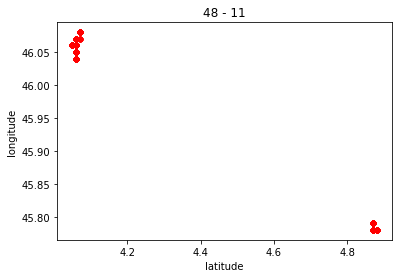

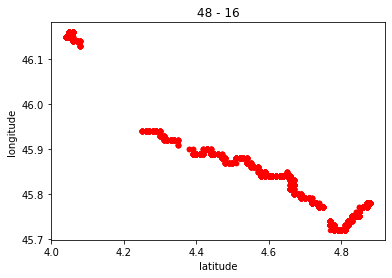

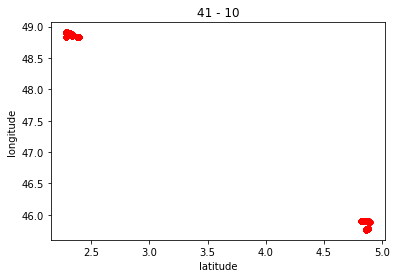

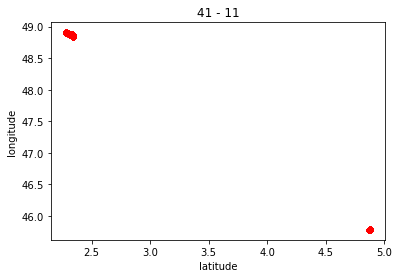

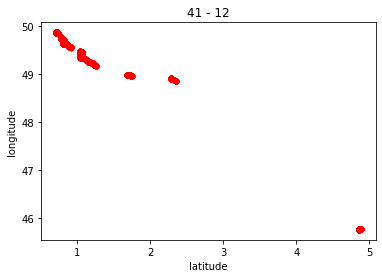

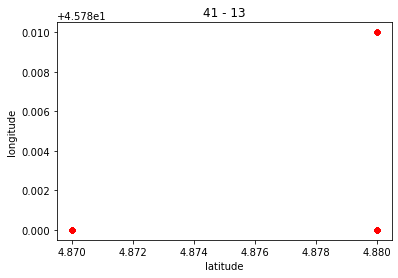

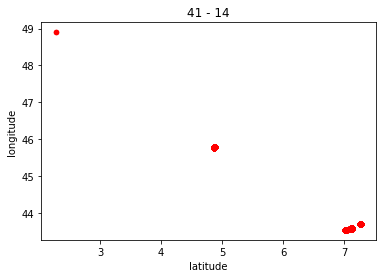

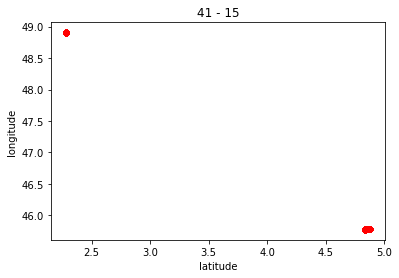

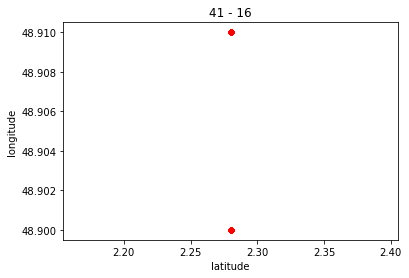

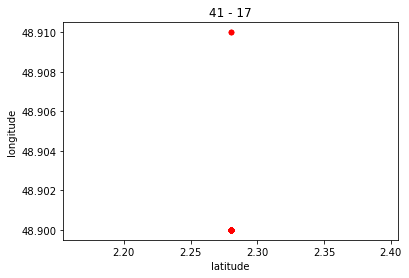

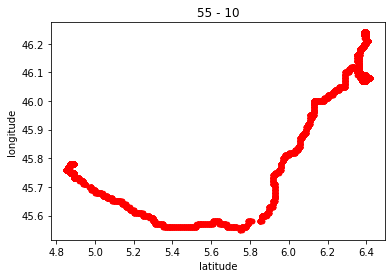

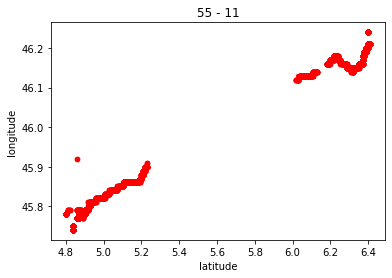

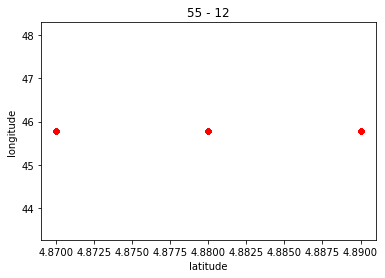

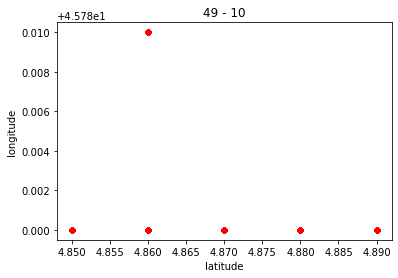

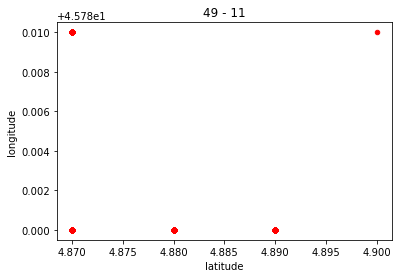

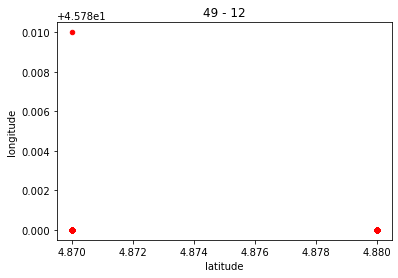

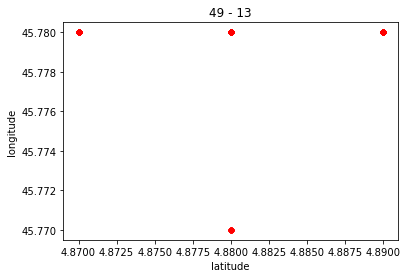

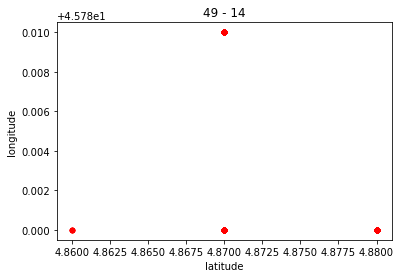

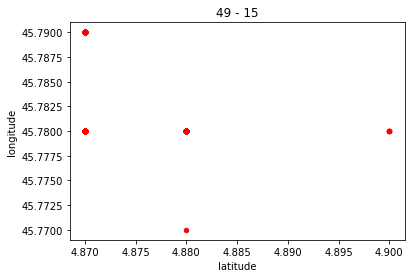

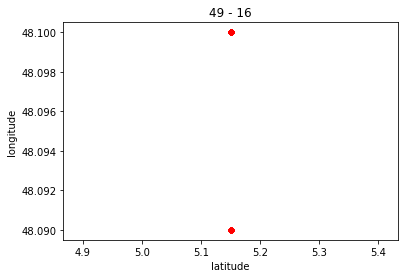

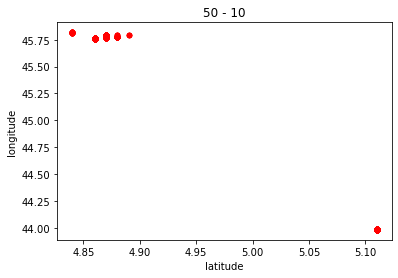

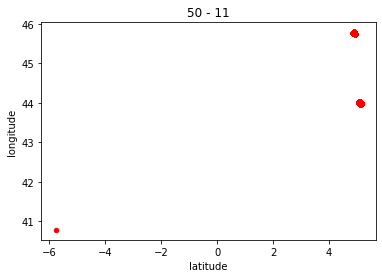

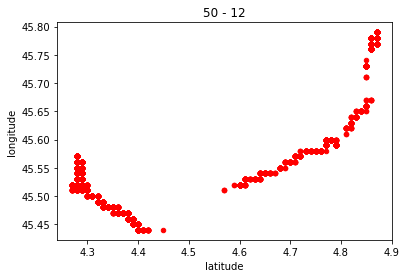

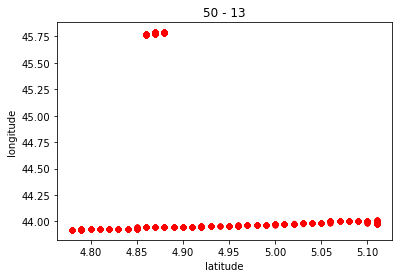

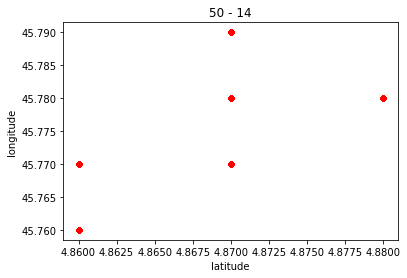

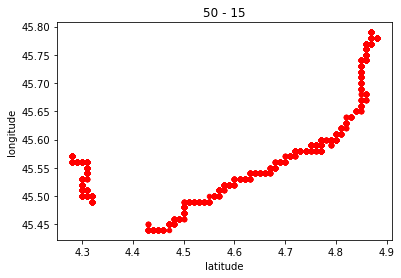

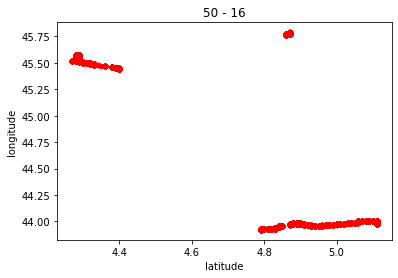

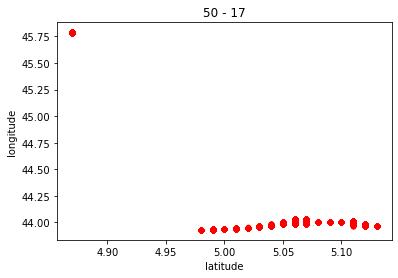

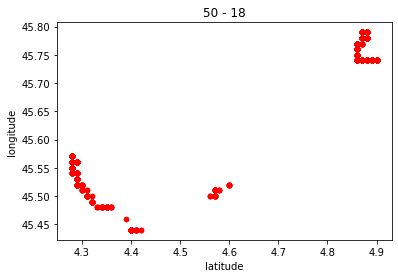

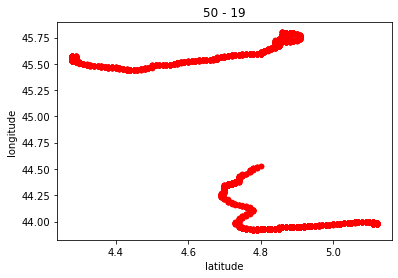

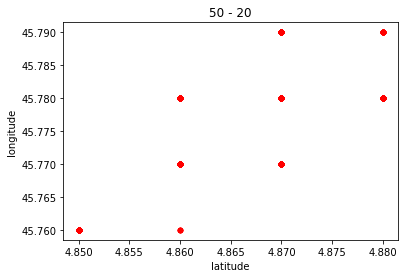

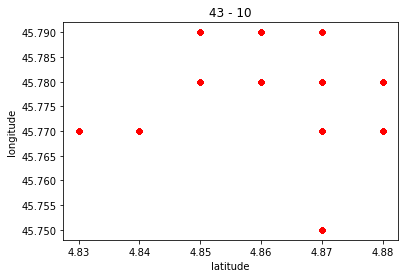

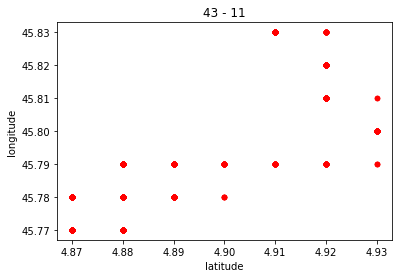

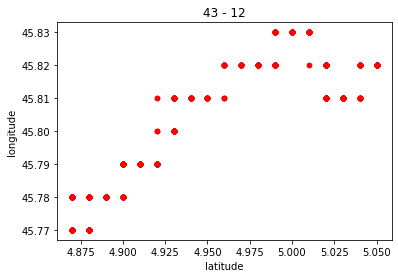

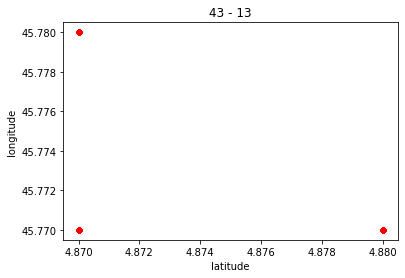

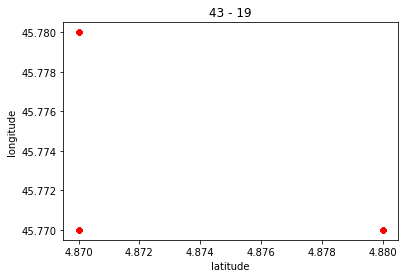

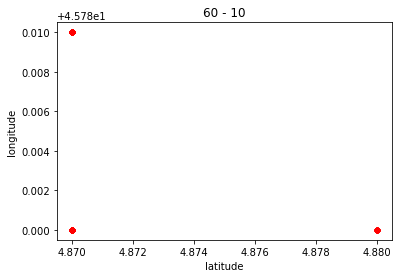

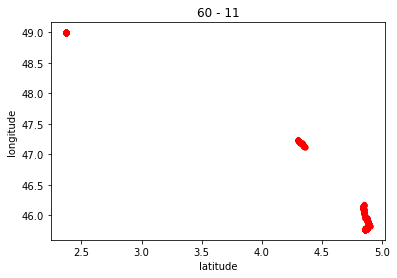

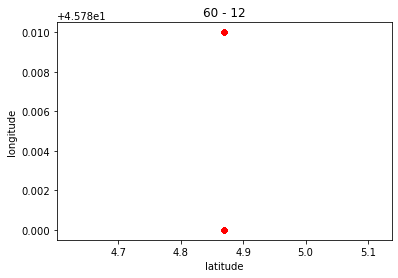

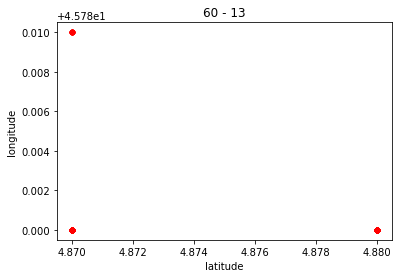

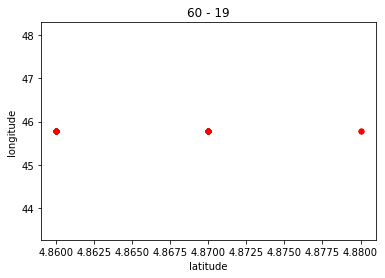

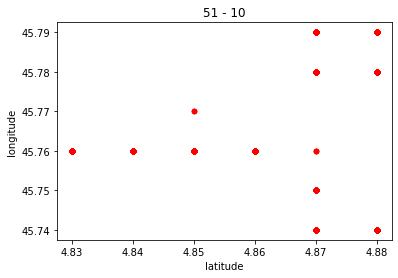

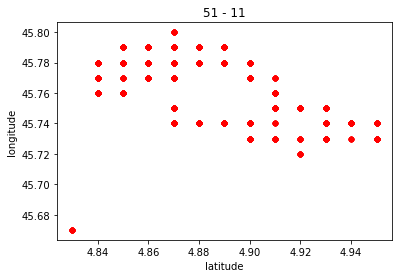

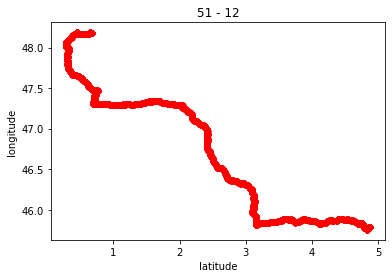

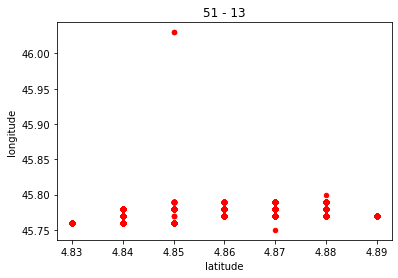

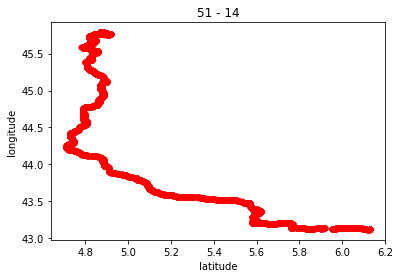

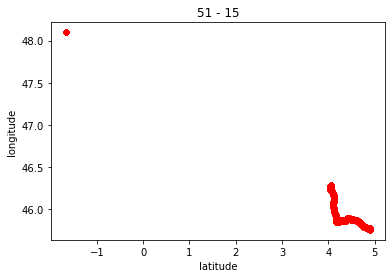

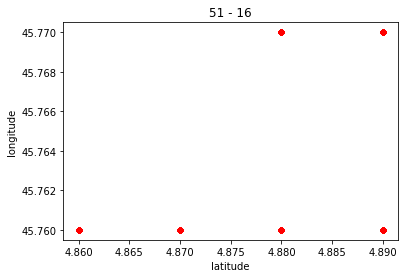

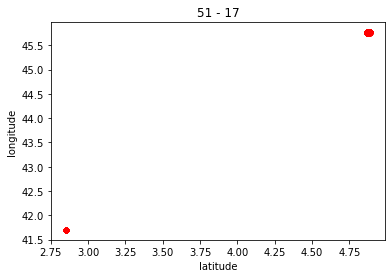

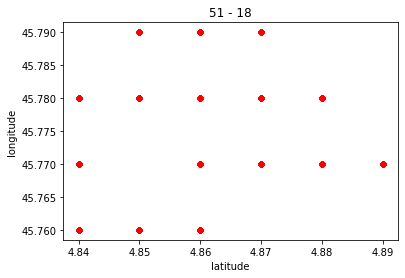

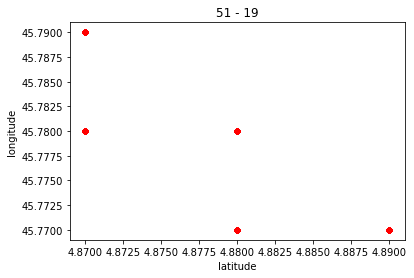

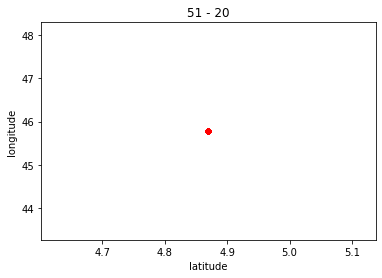

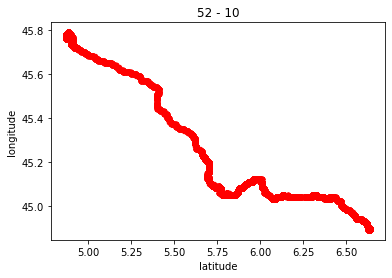

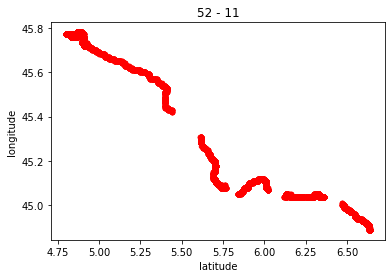

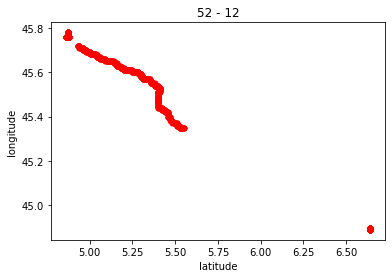

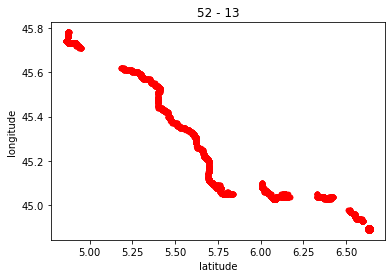

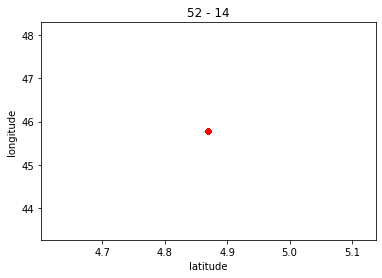

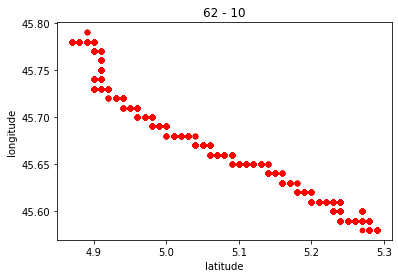

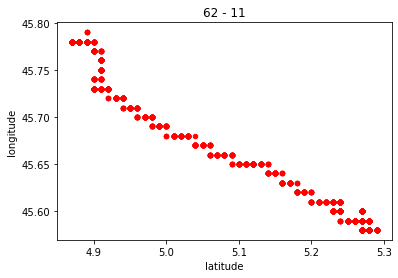

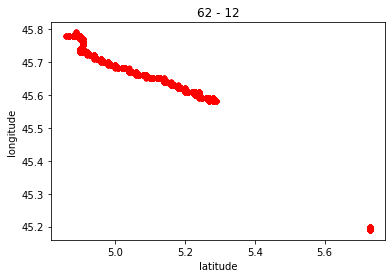

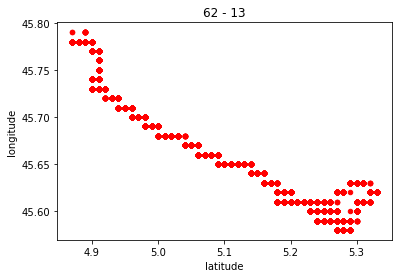

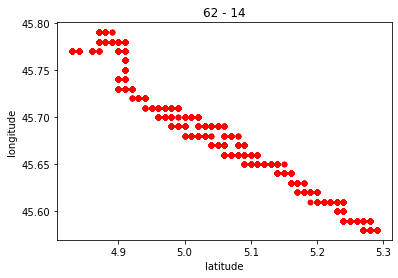

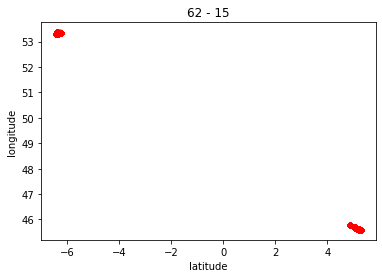

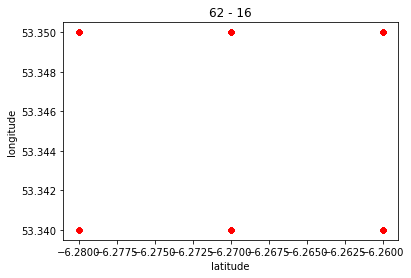

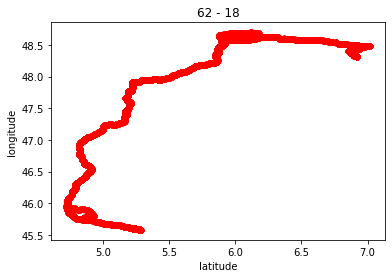

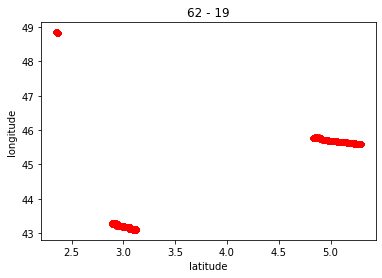

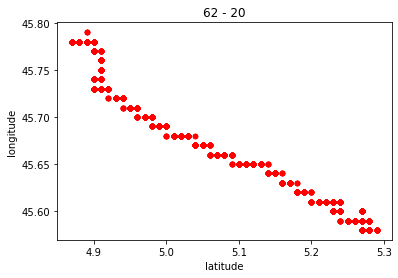

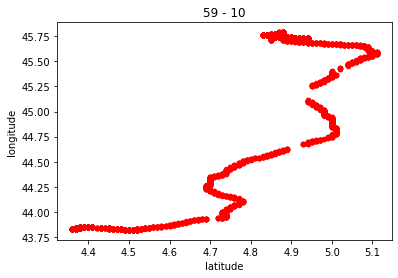

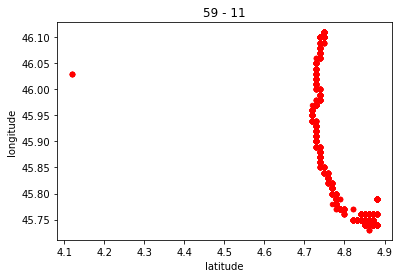

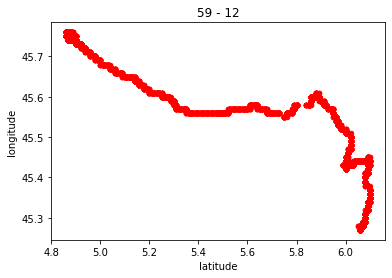

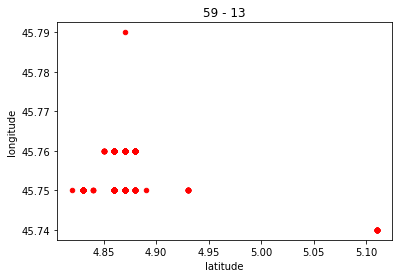

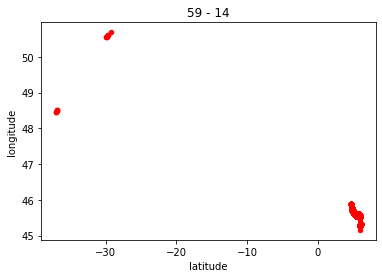

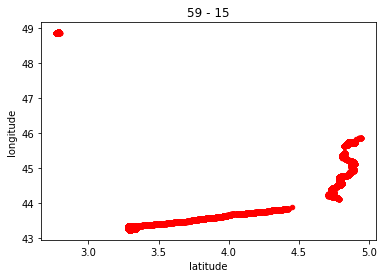

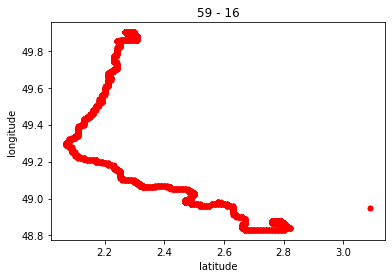

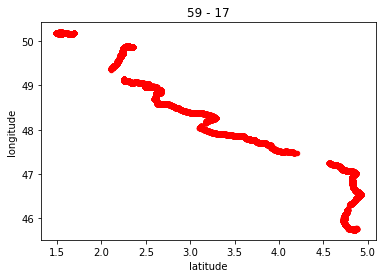

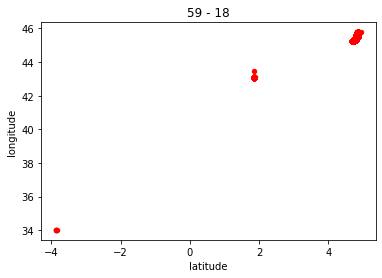

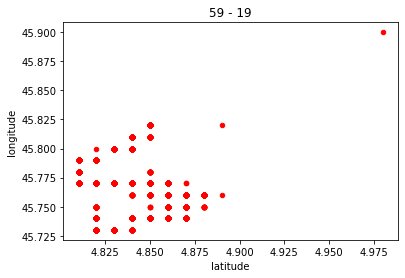

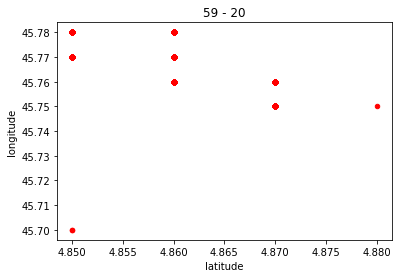

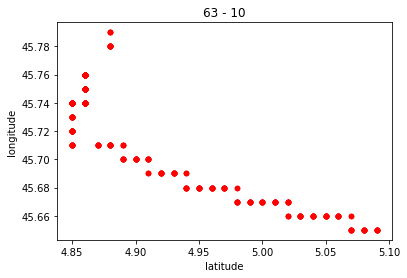

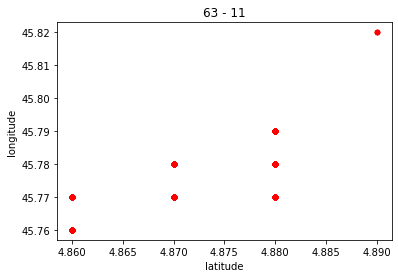

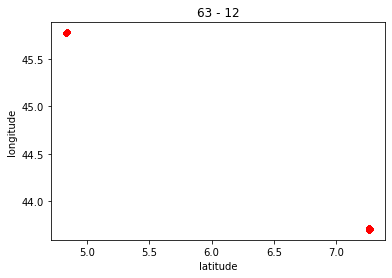

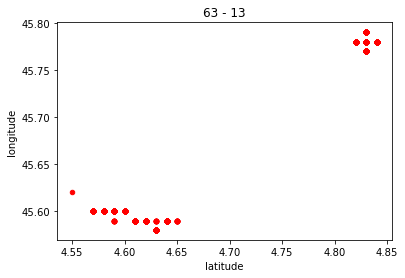

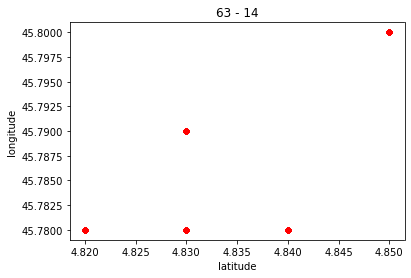

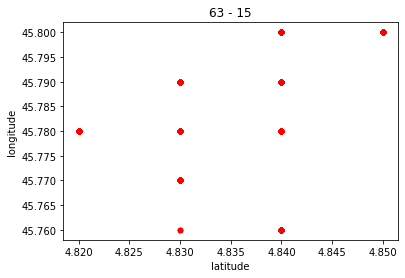

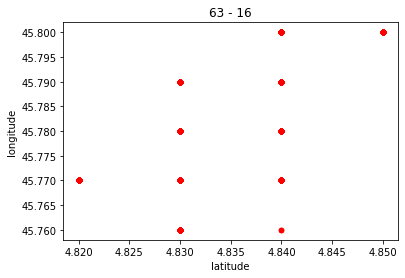

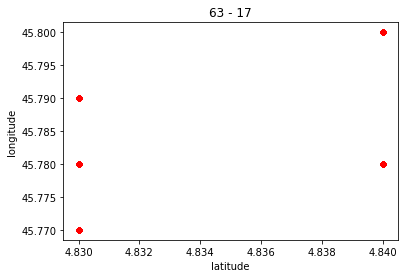

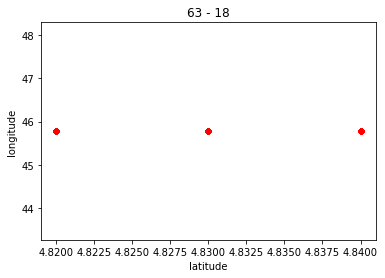

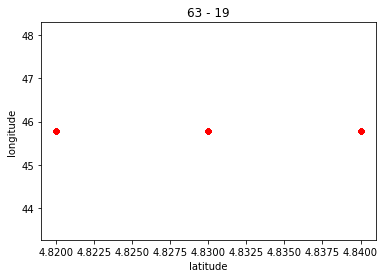

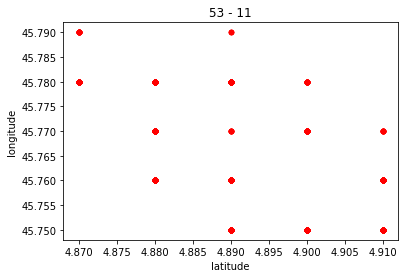

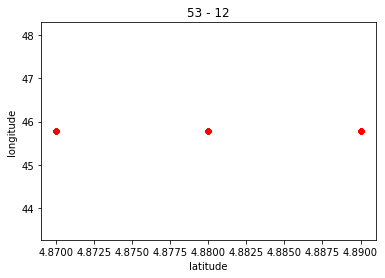

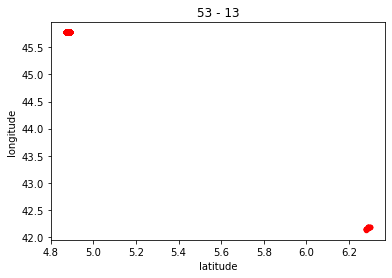

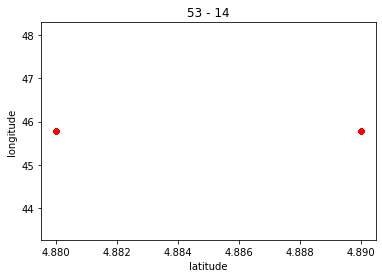

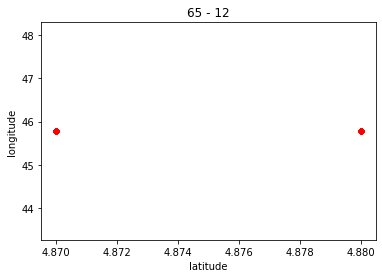

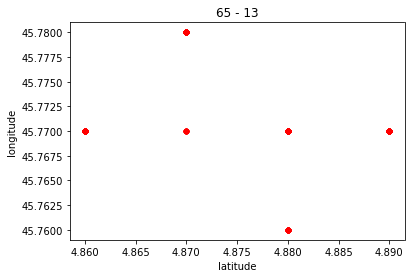

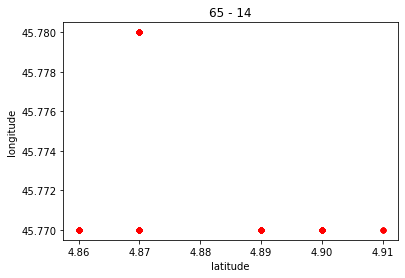

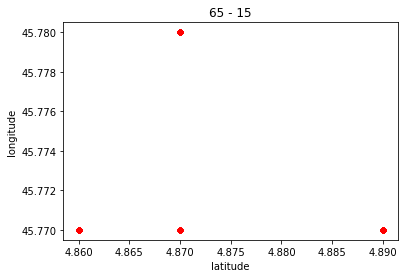

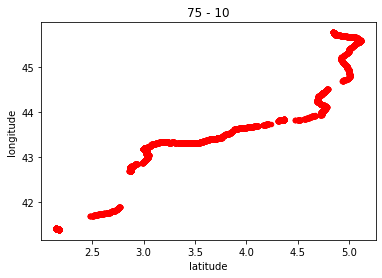

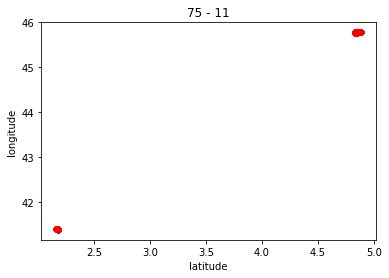

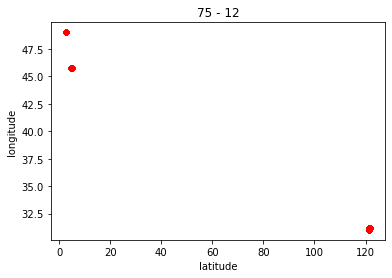

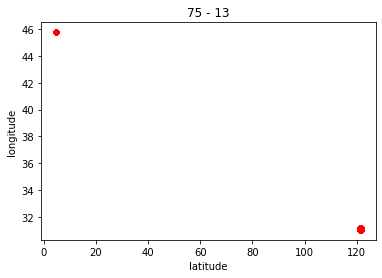

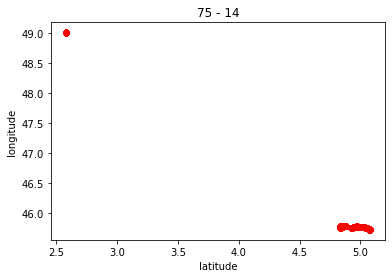

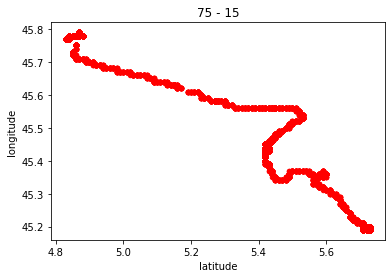

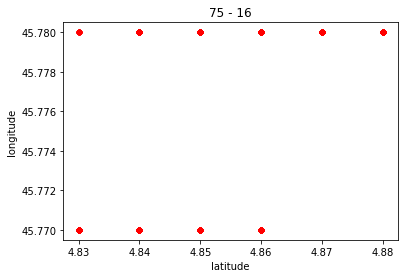

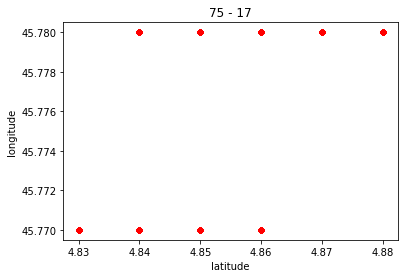

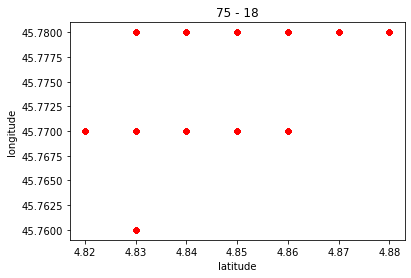

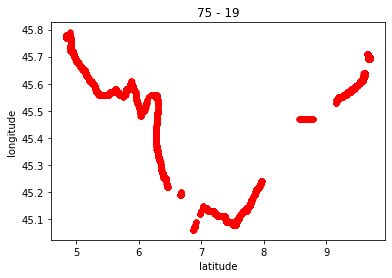

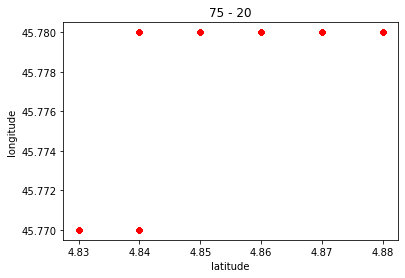

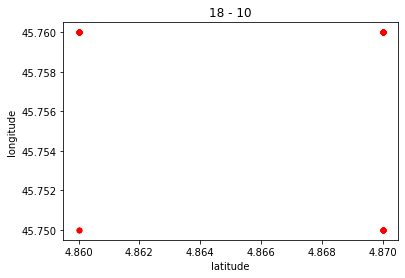

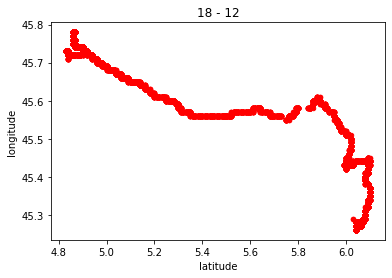

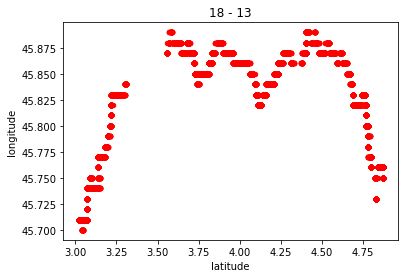

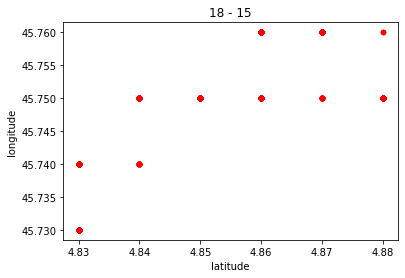

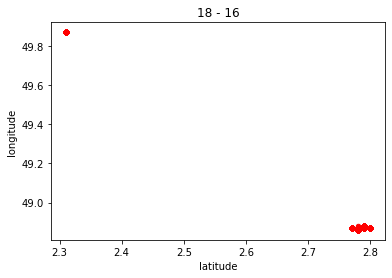

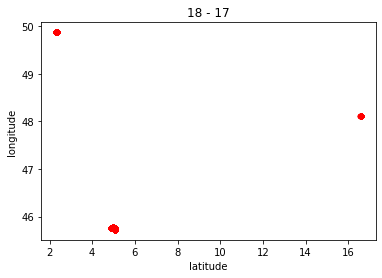

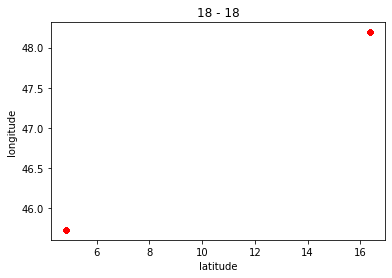

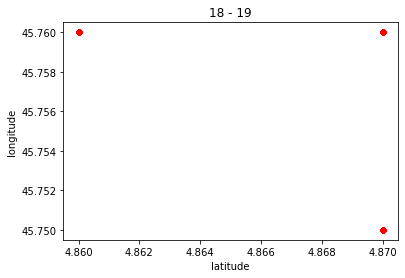

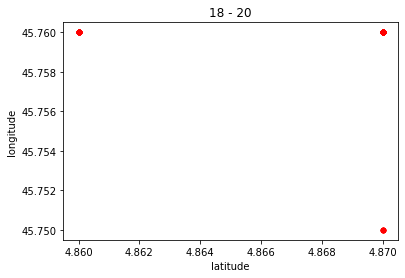

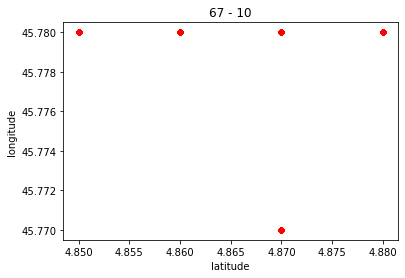

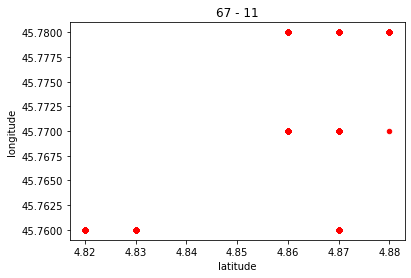

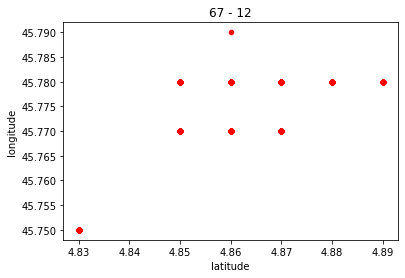

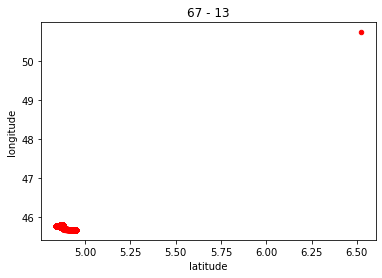

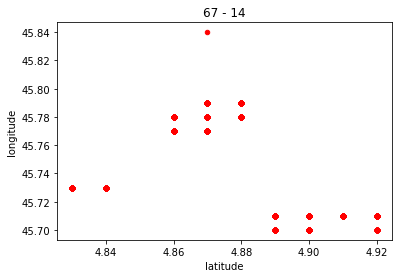

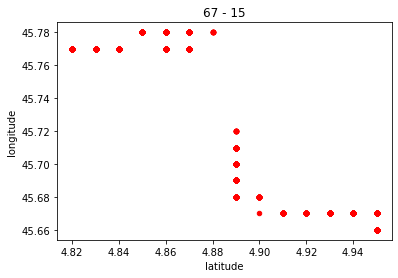

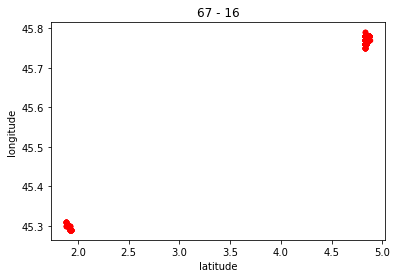

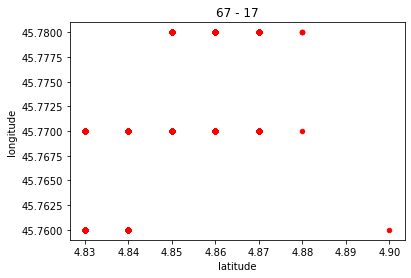

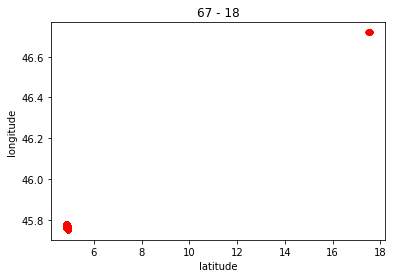

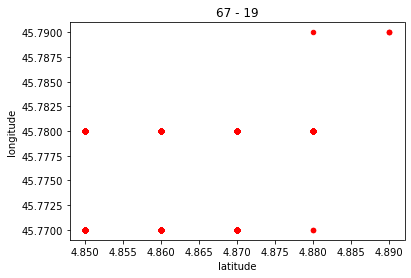

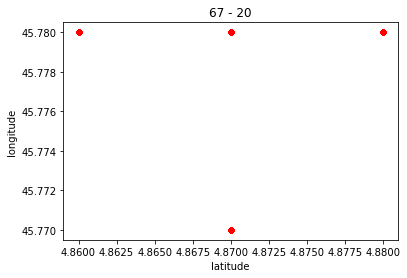

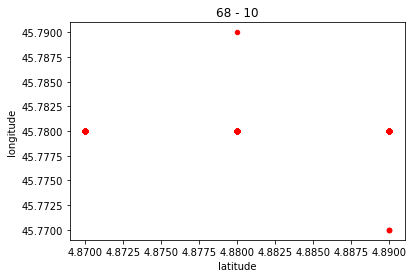

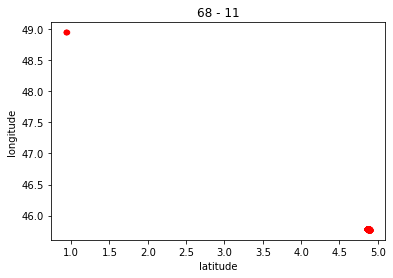

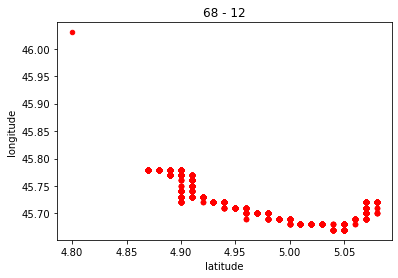

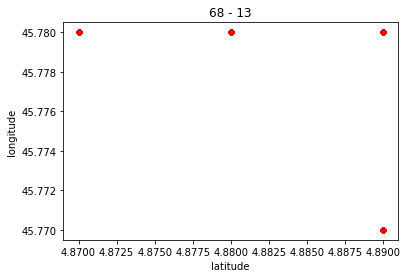

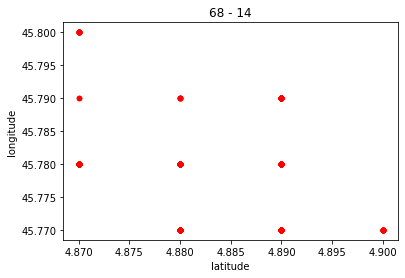

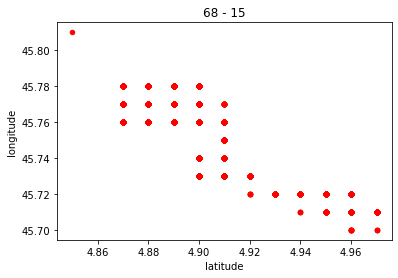

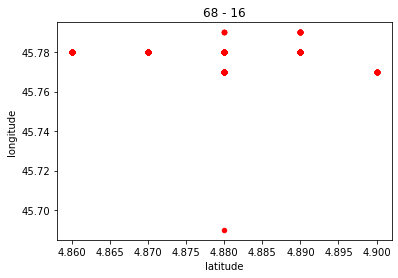

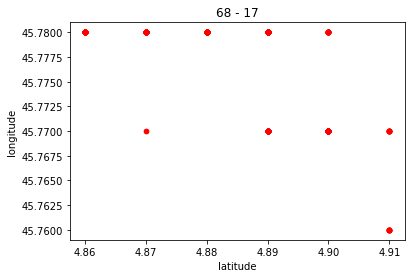

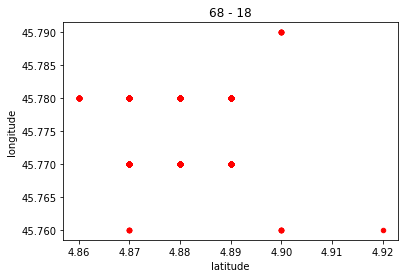

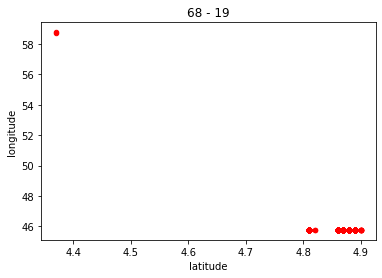

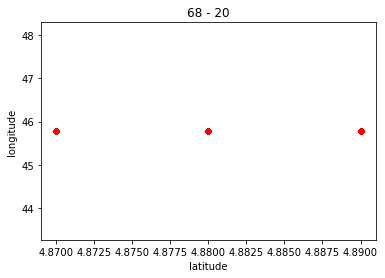

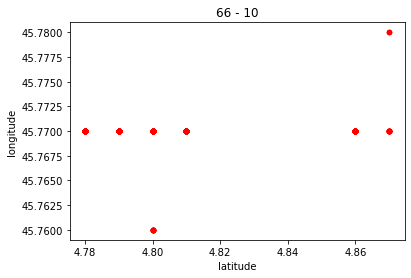

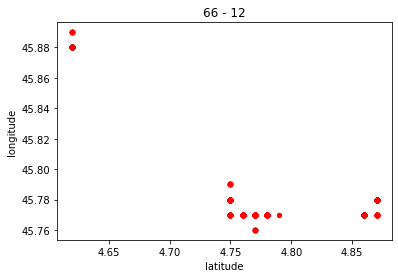

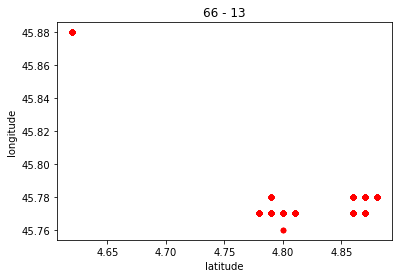

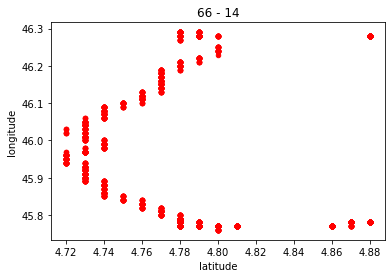

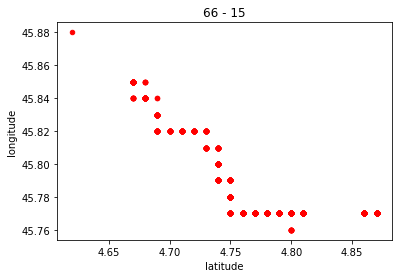

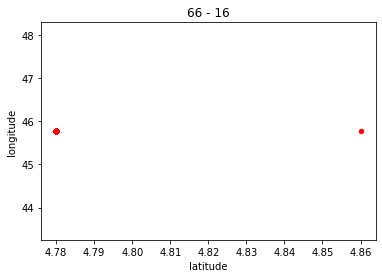

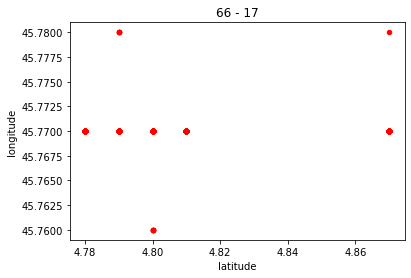

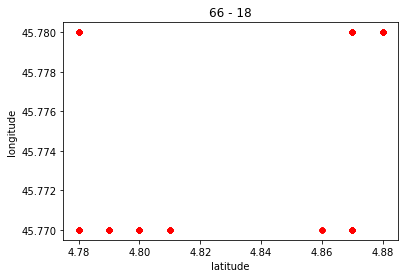

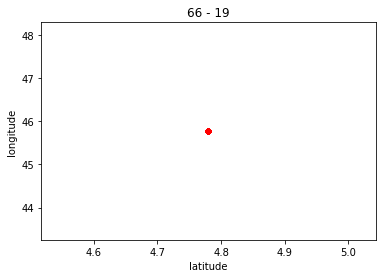

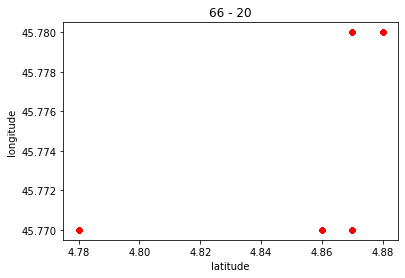

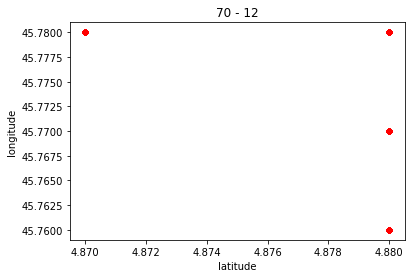

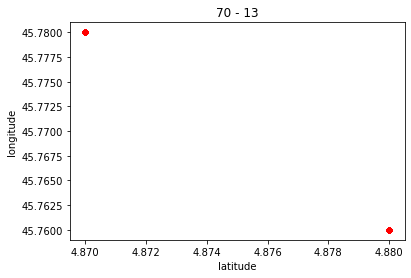

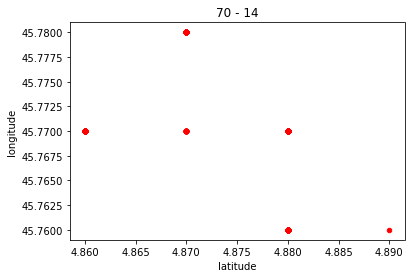

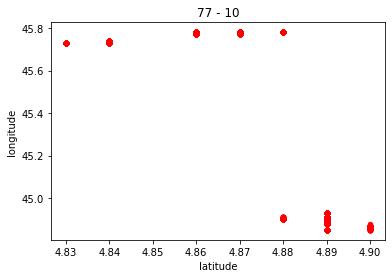

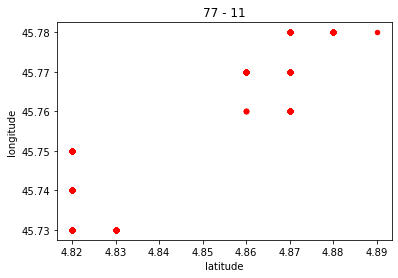

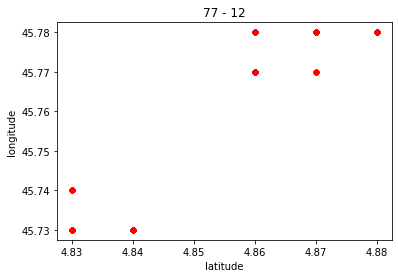

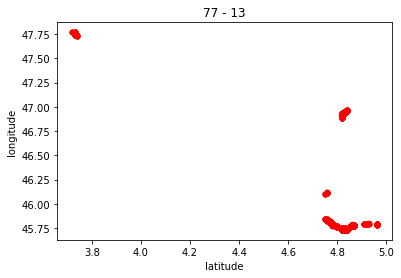

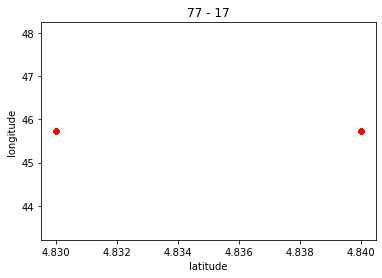

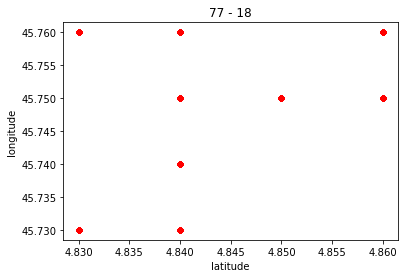

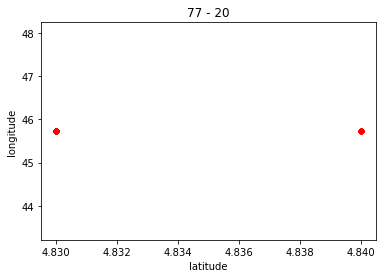

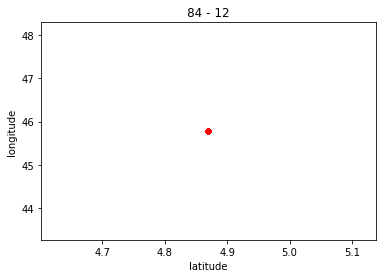

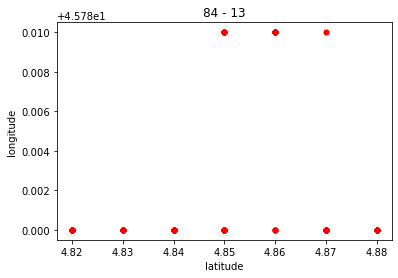

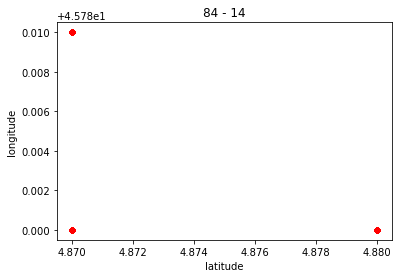

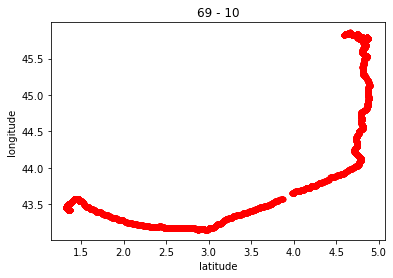

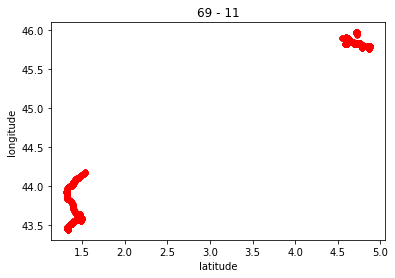

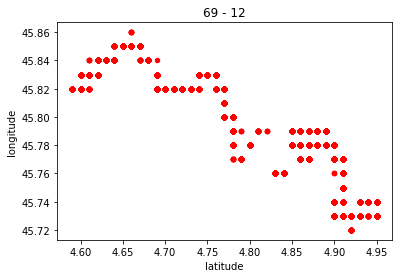

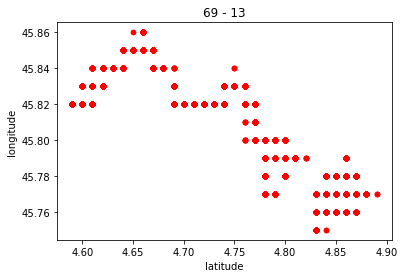

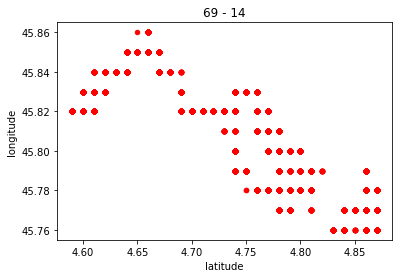

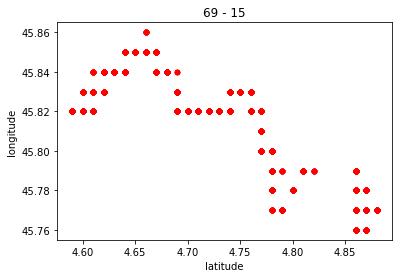

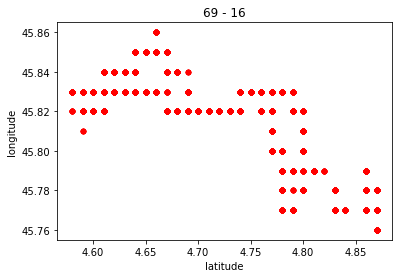

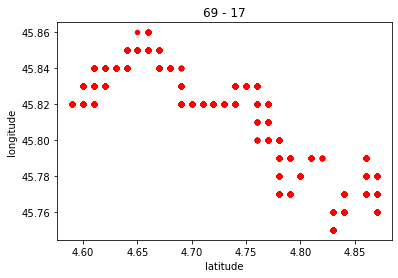

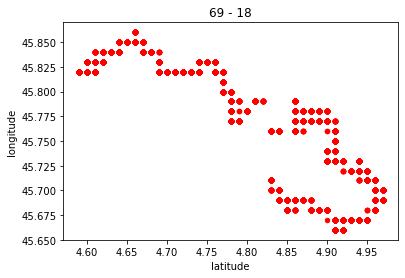

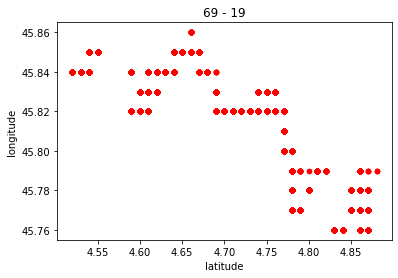

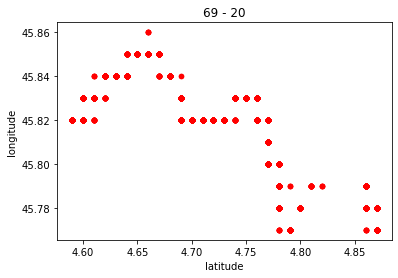

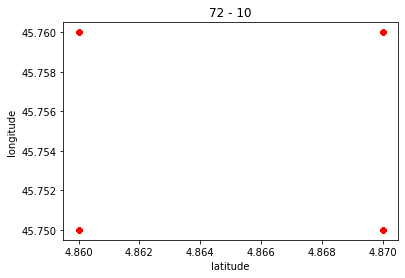

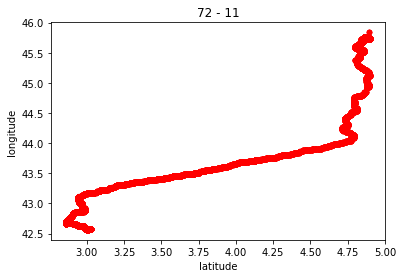

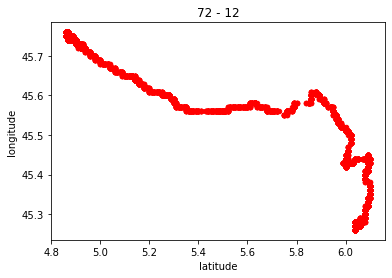

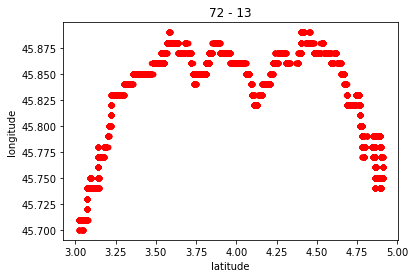

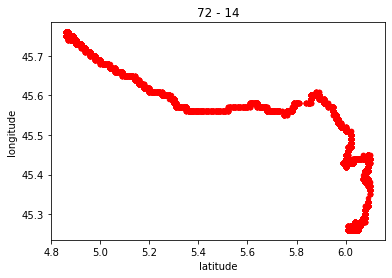

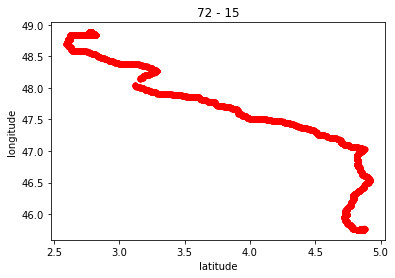

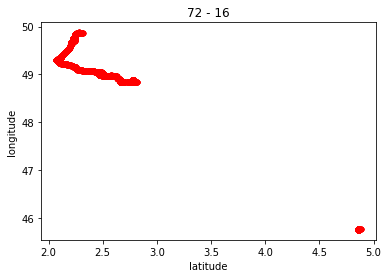

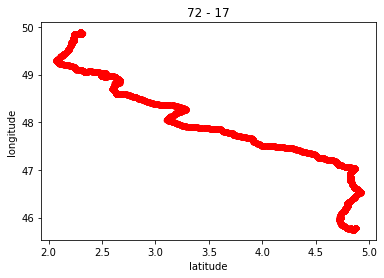

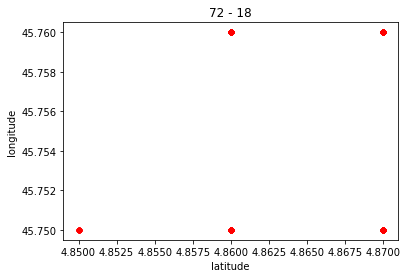

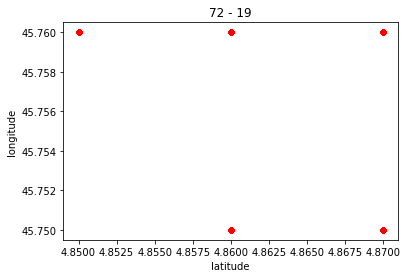

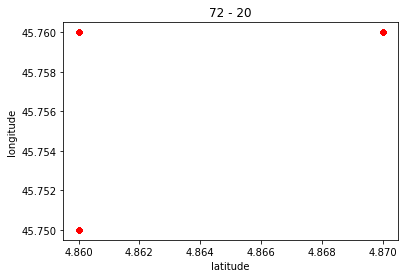

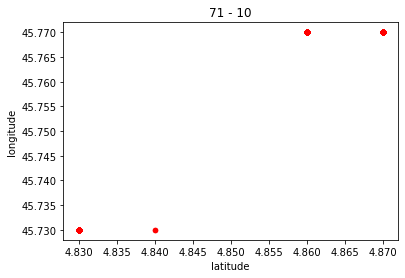

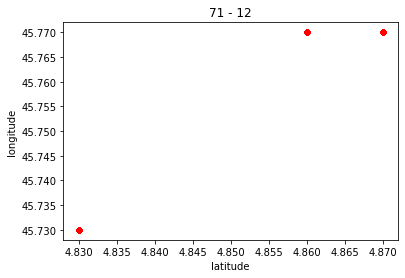

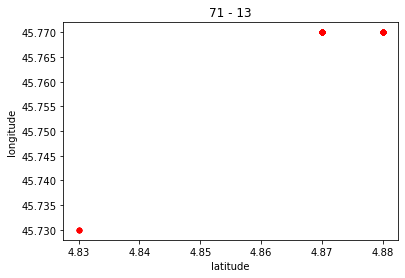

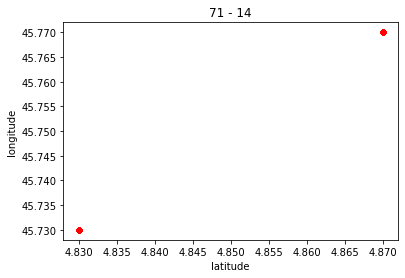

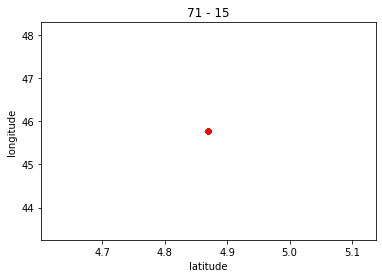

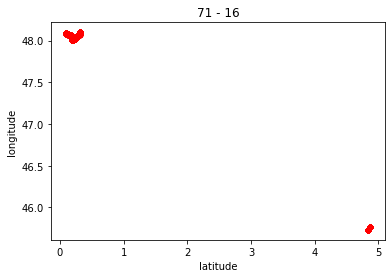

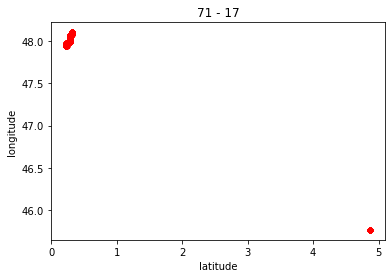

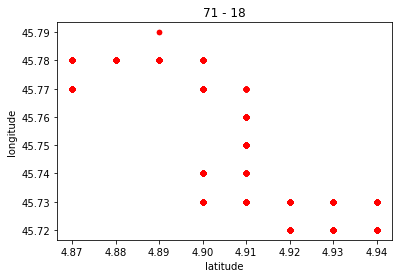

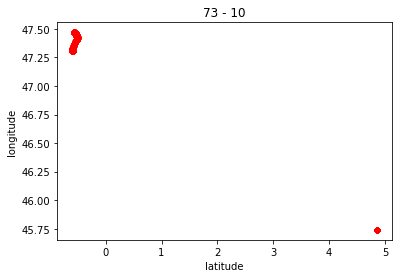

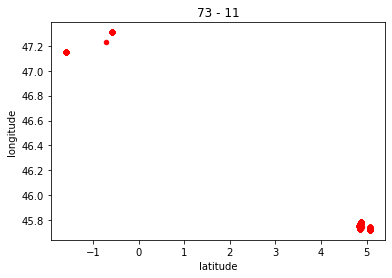

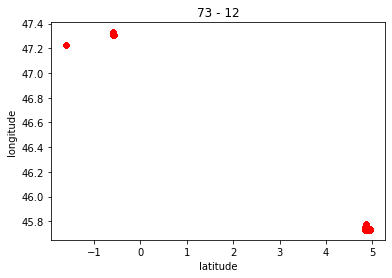

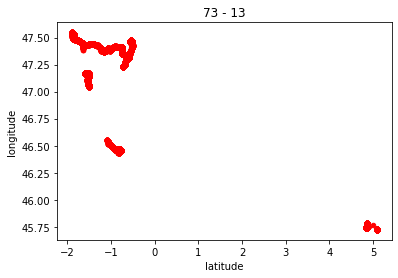

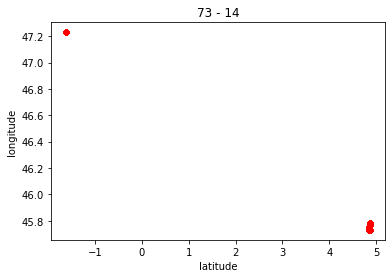

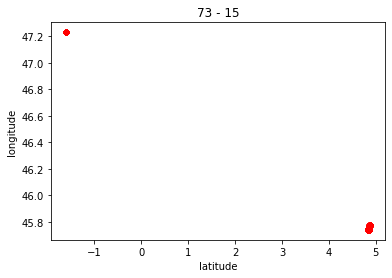

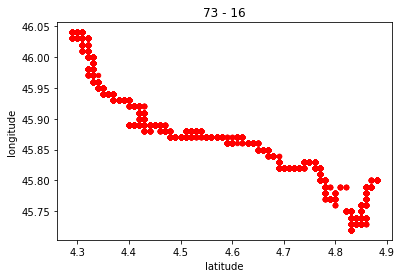

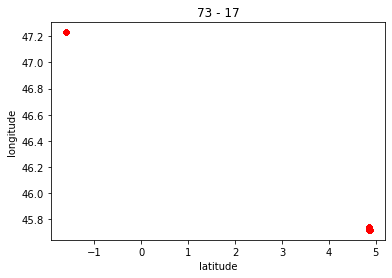

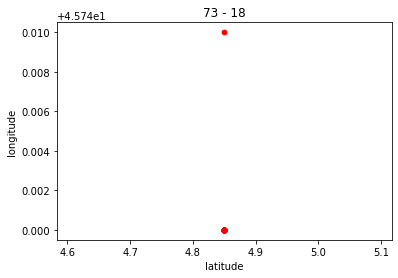

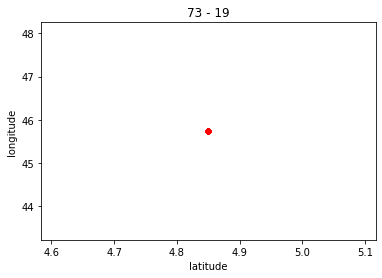

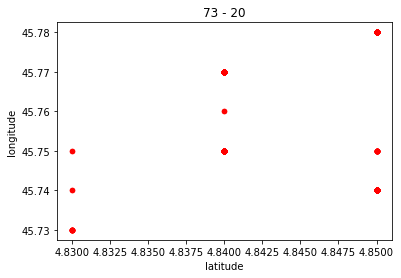

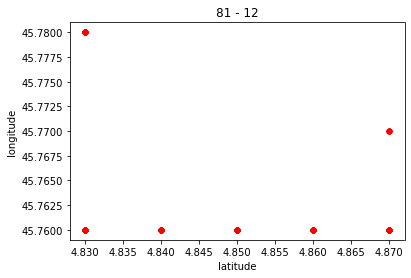

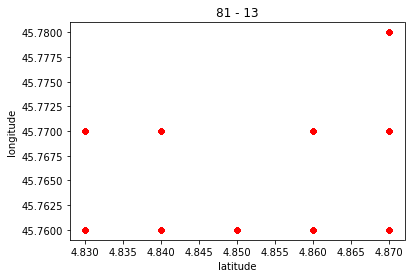

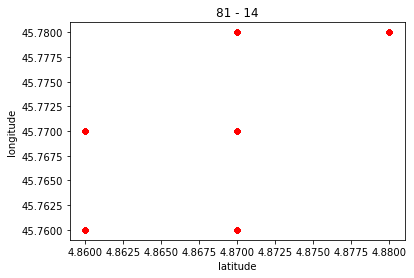

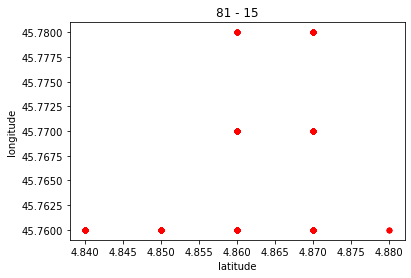

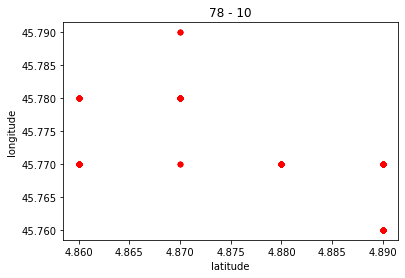

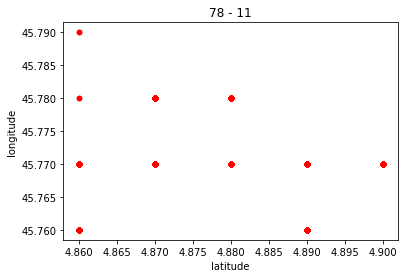

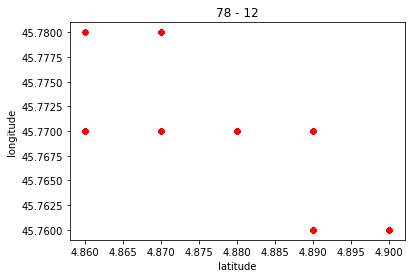

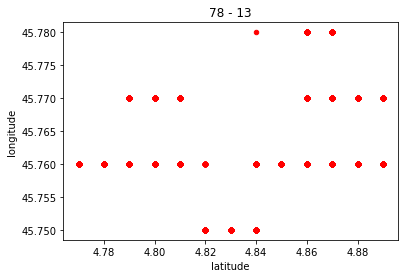

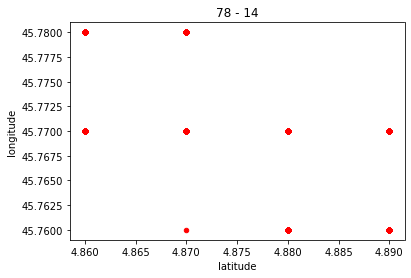

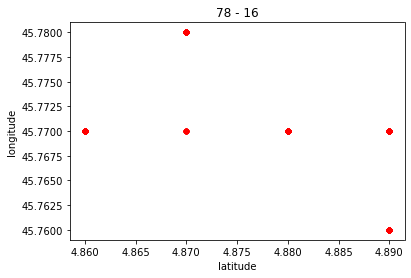

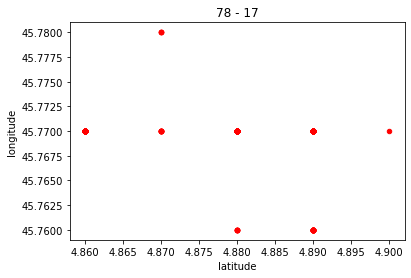

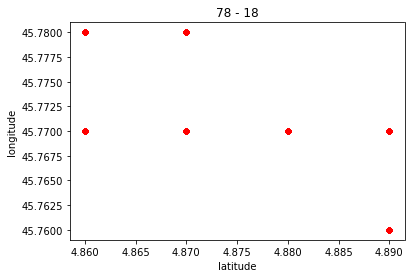

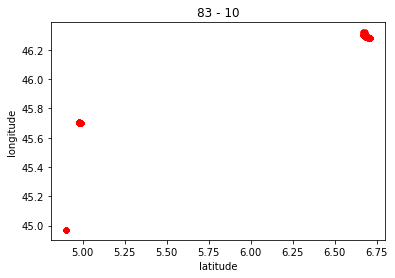

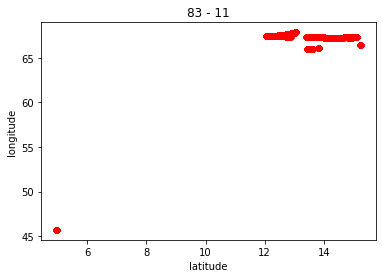

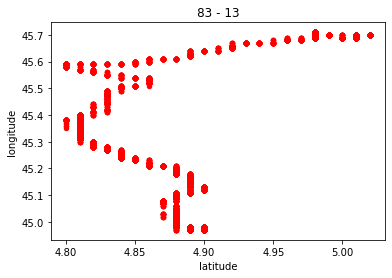

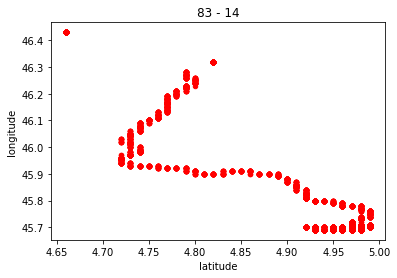

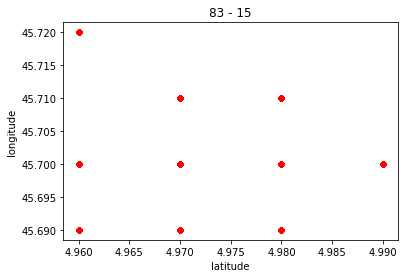

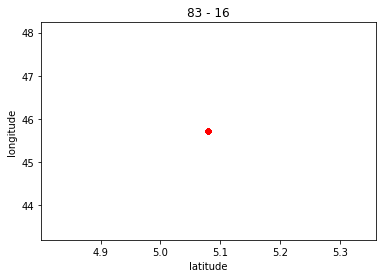

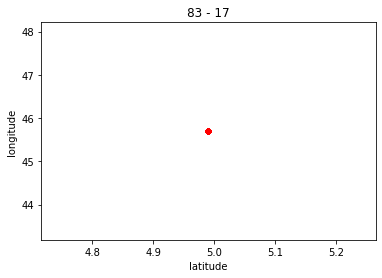

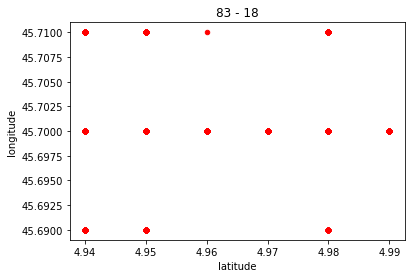

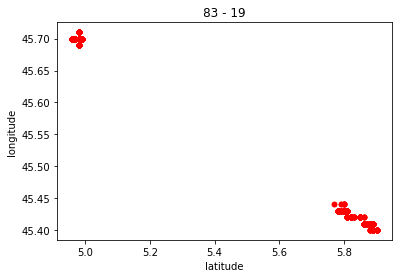

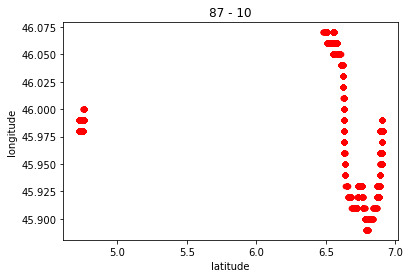

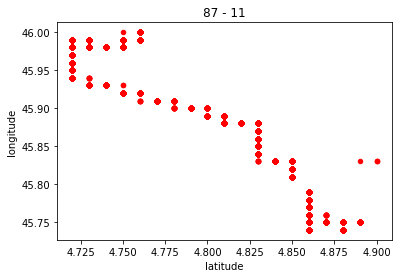

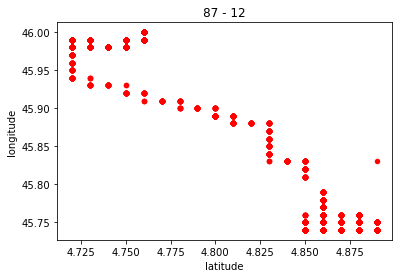

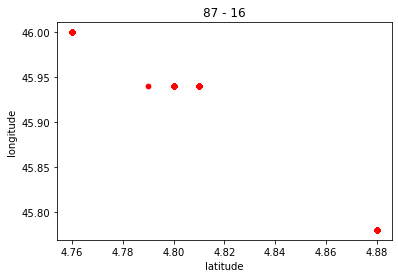

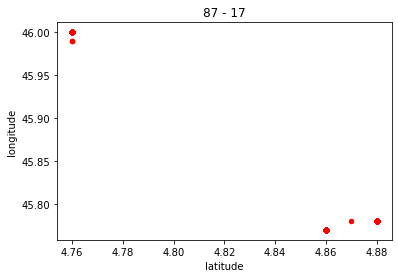

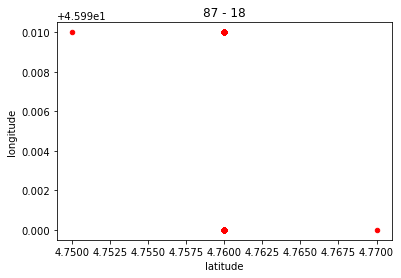

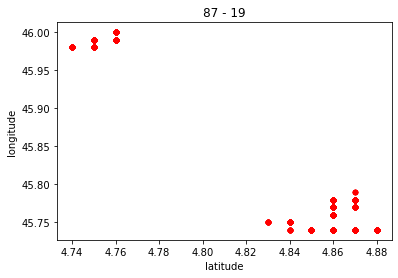

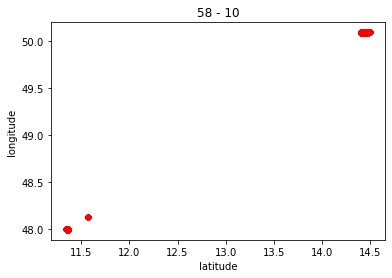

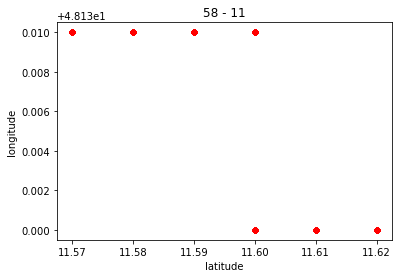

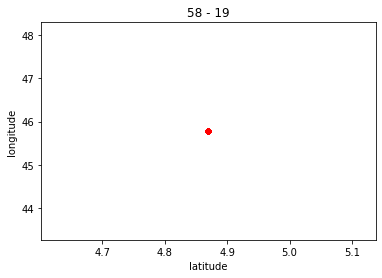

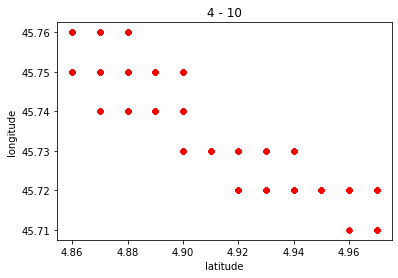

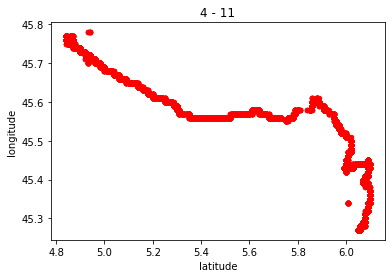

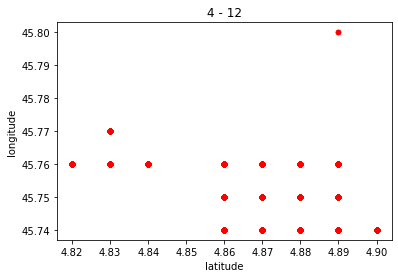

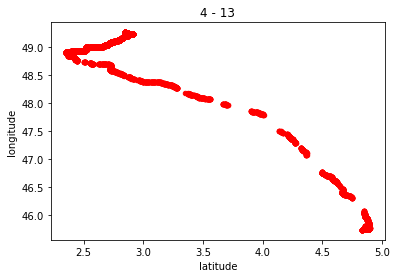

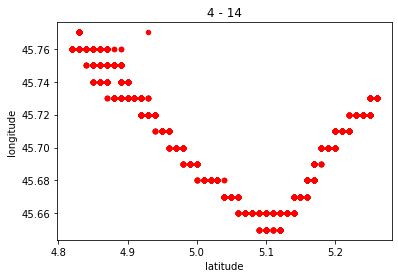

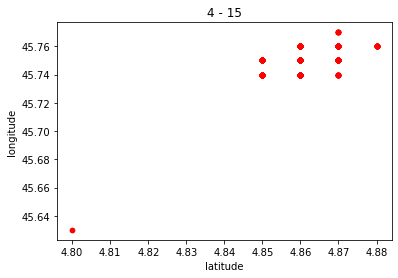

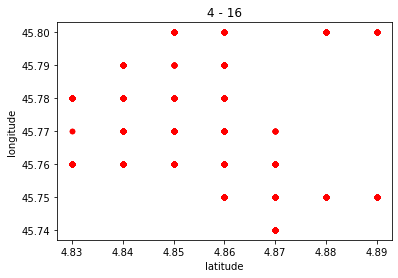

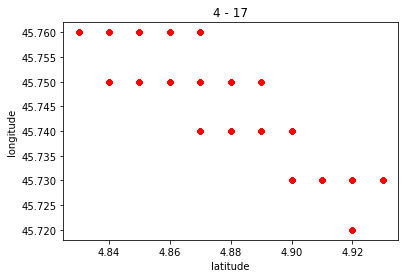

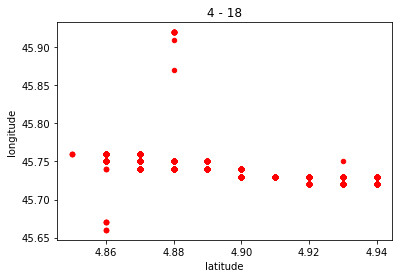

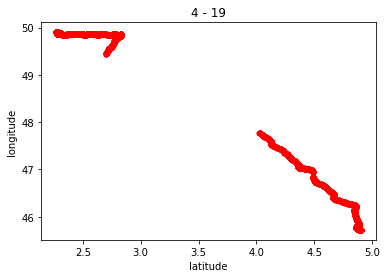

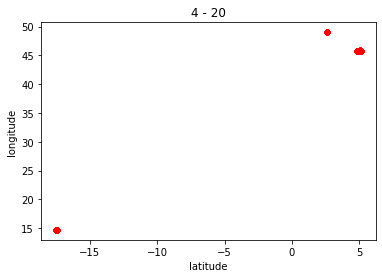

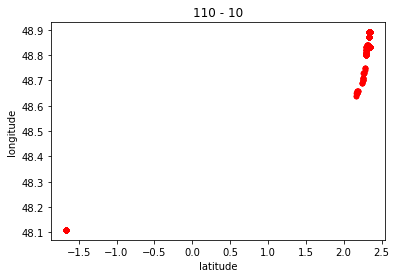

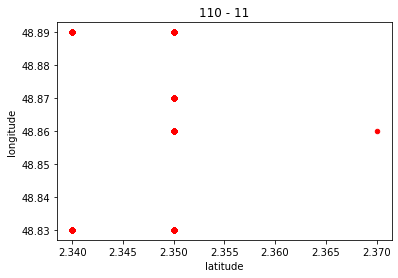

In [5]:
import matplotlib.pyplot as plt
df.latitude = df.latitude.round(decimals = 2)
df.longitude = df.longitude.round(decimals = 2)
for i in list_id_ori: 
    for w in id_week_ori[i]:
        df.loc[(df['id'] == i) & (df['week'] == w)].plot(kind='scatter',x='latitude',y='longitude',color='red')
        plt.title(f"{i} - {w}")
        plt.show()

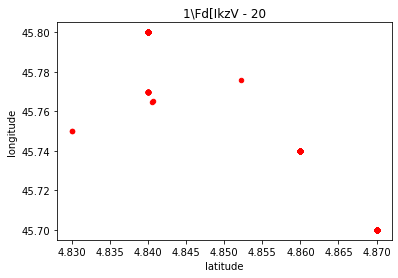

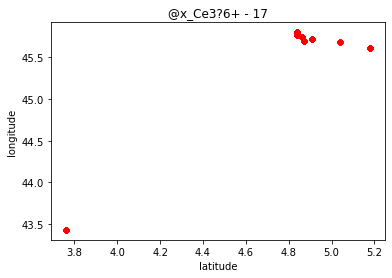

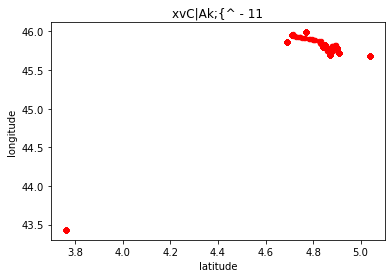

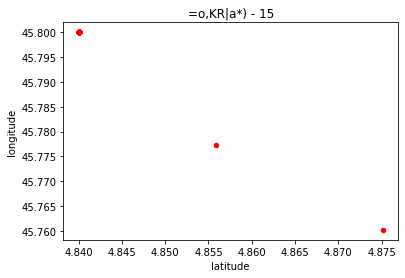

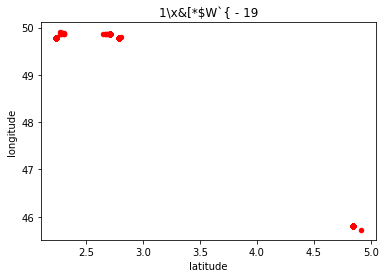

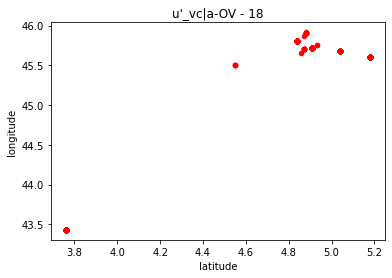

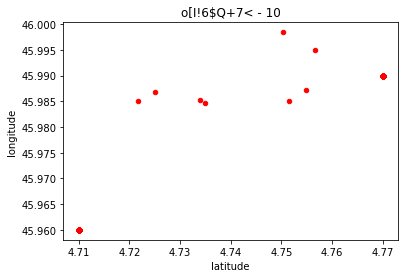

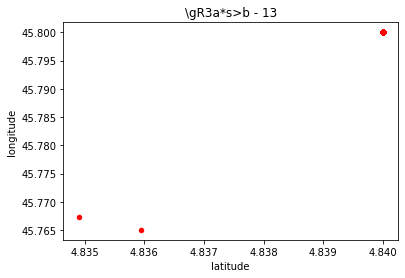

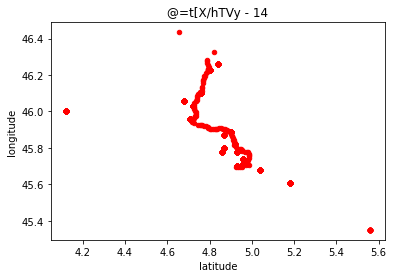

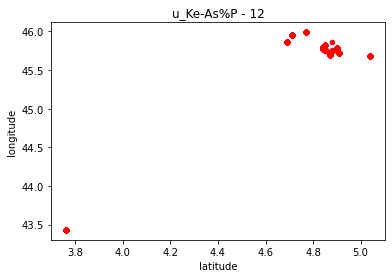

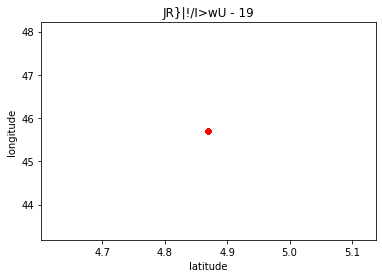

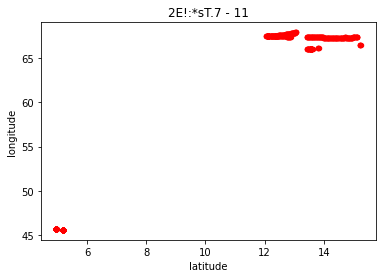

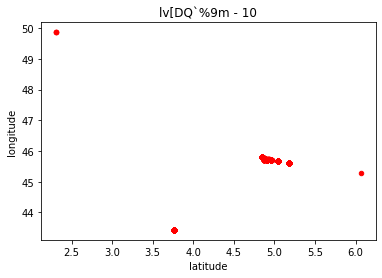

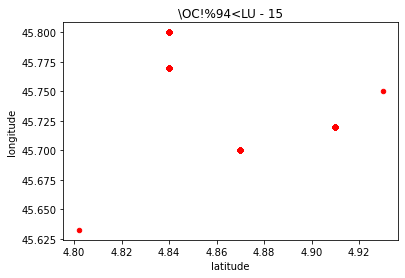

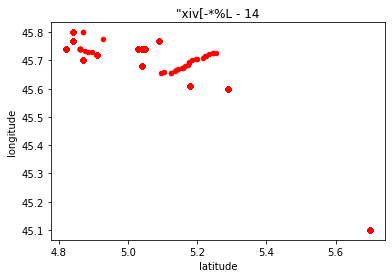

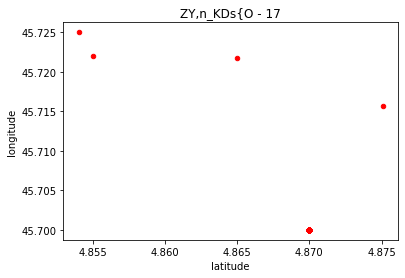

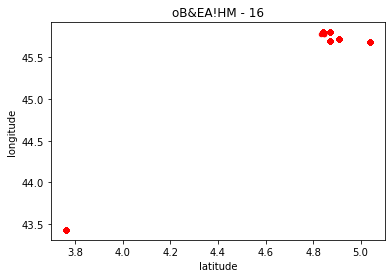

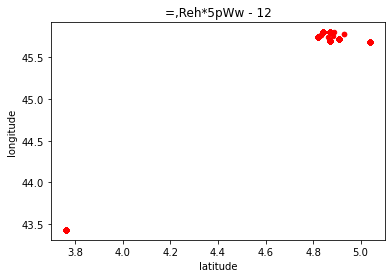

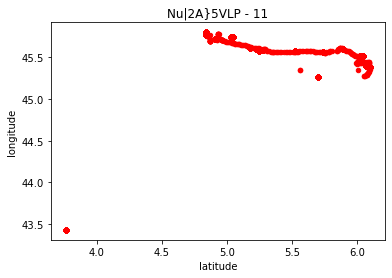

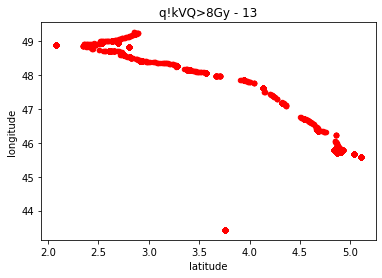

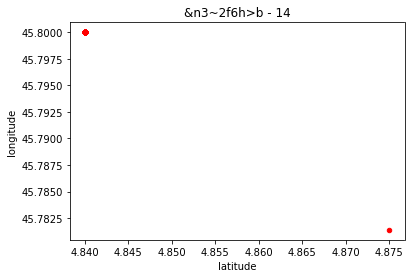

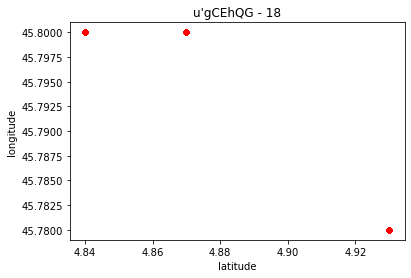

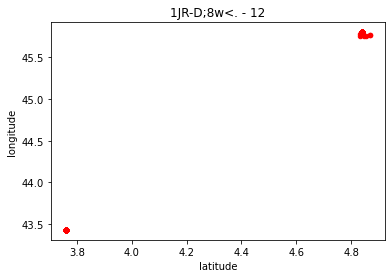

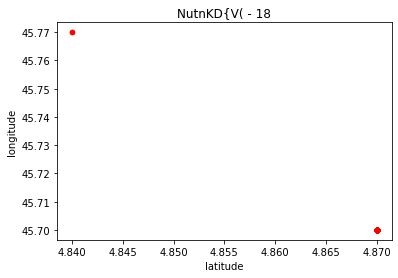

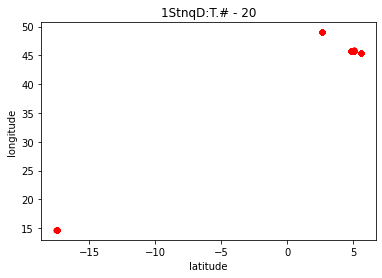

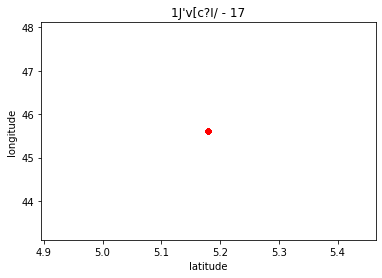

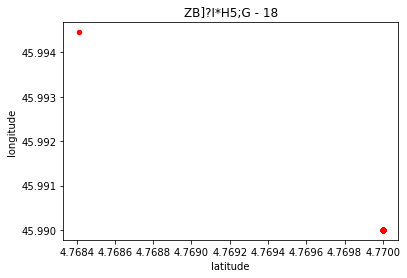

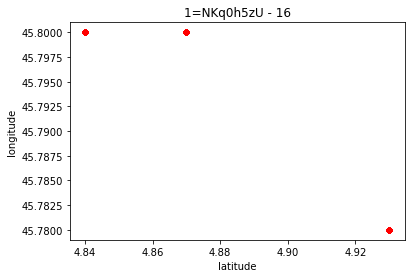

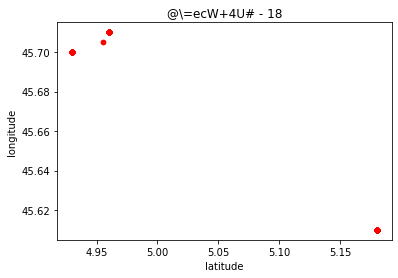

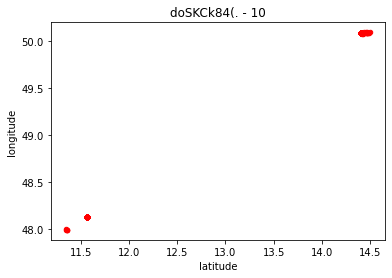

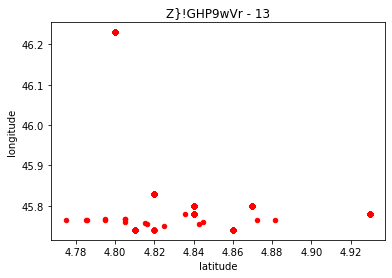

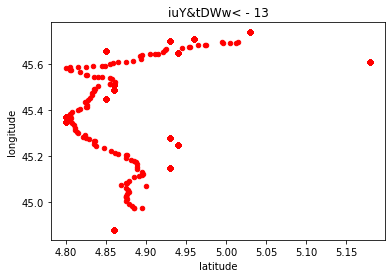

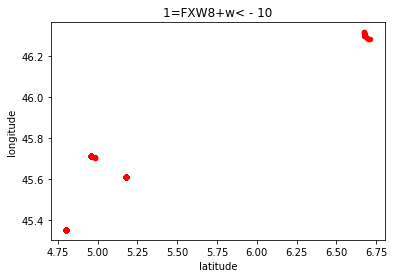

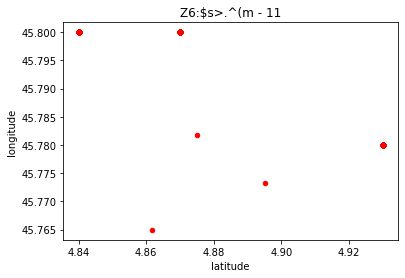

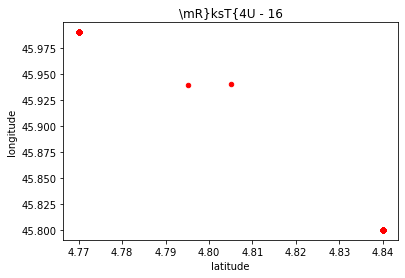

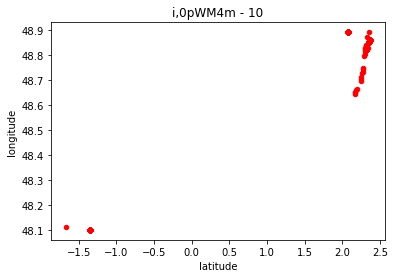

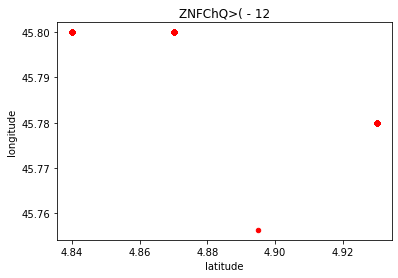

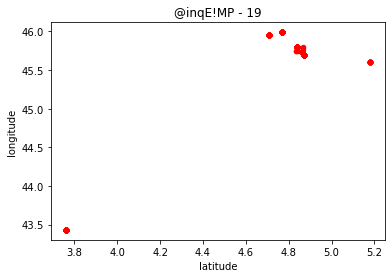

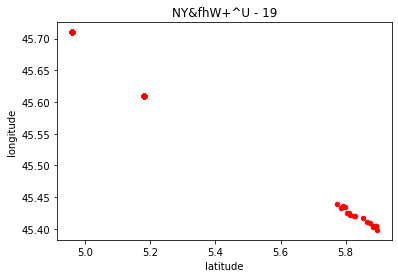

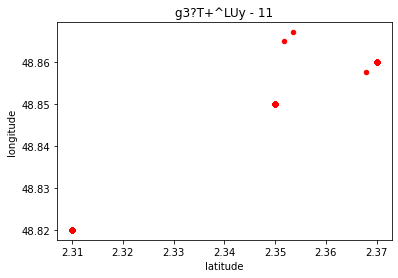

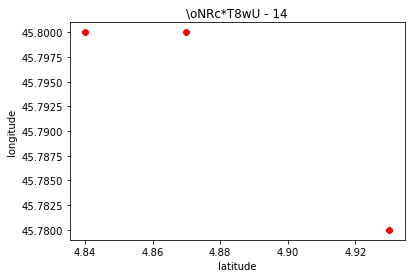

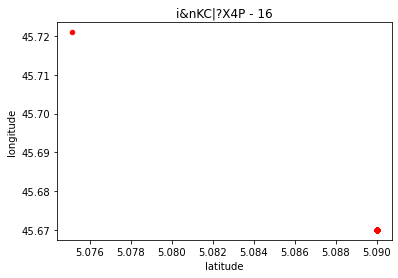

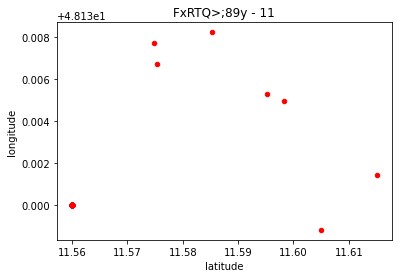

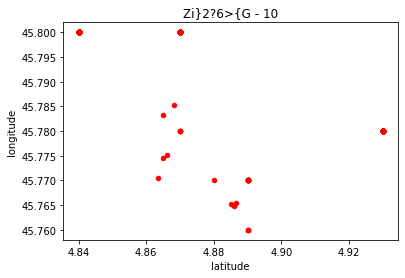

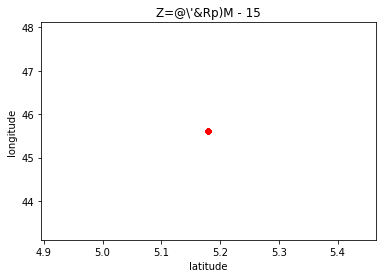

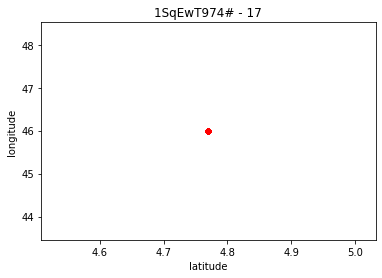

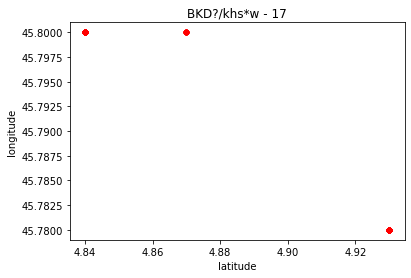

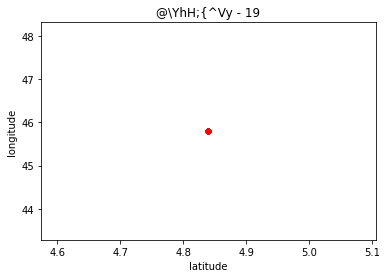

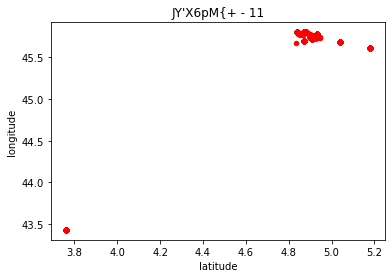

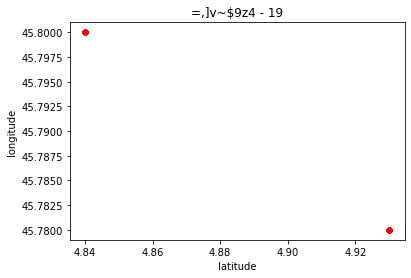

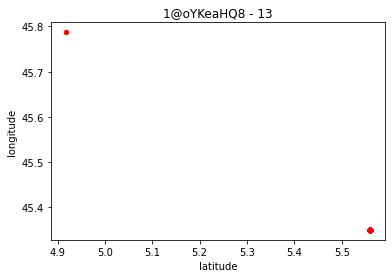

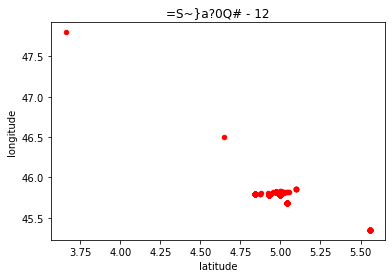

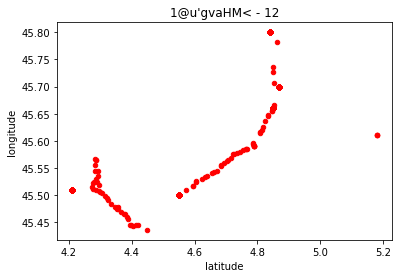

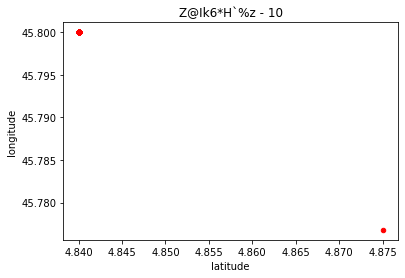

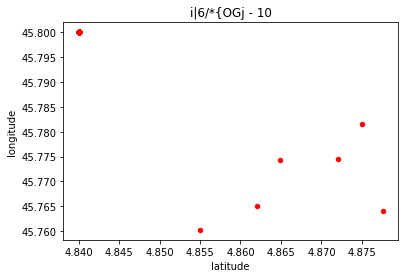

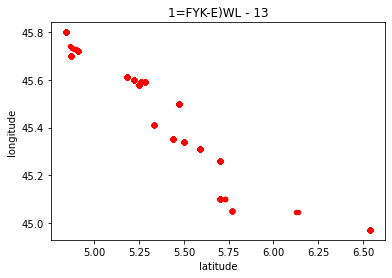

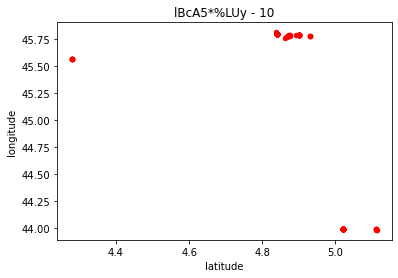

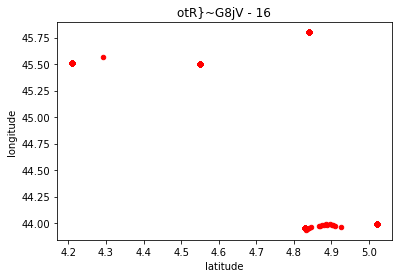

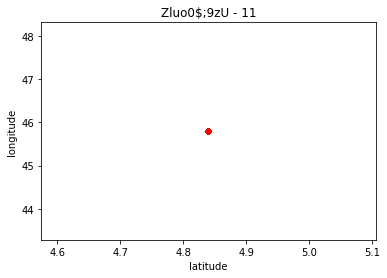

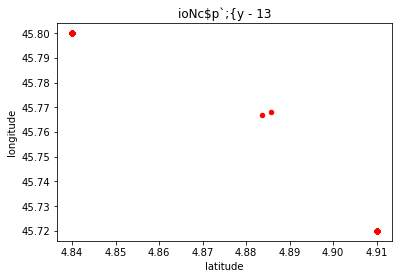

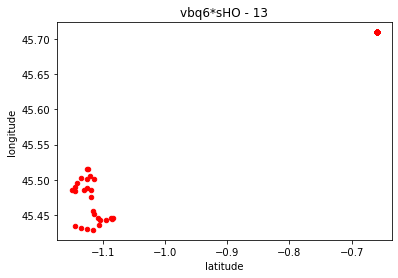

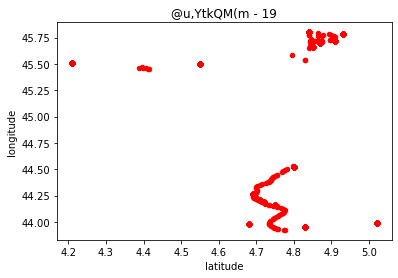

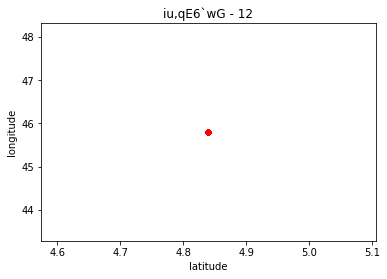

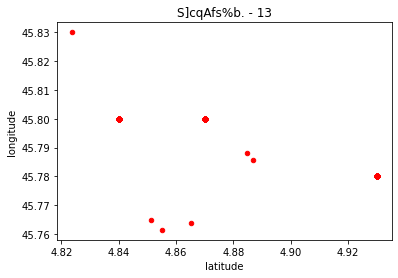

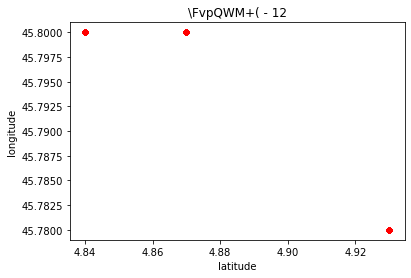

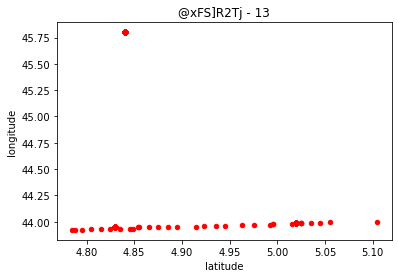

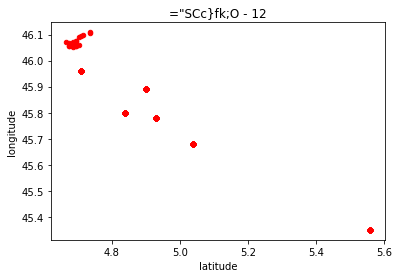

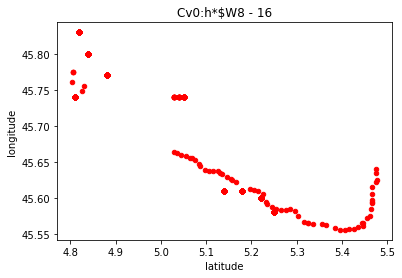

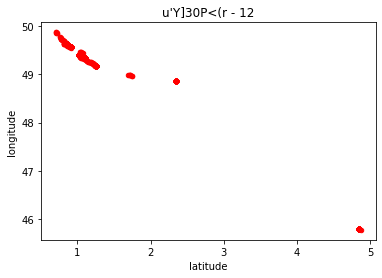

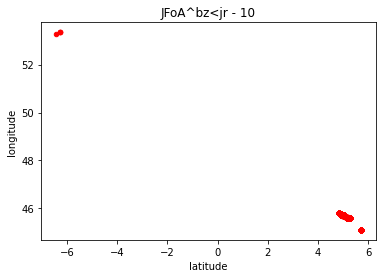

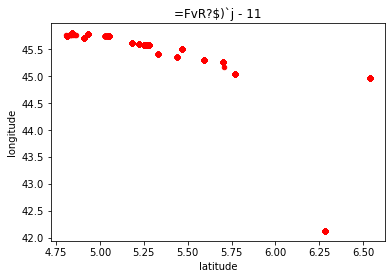

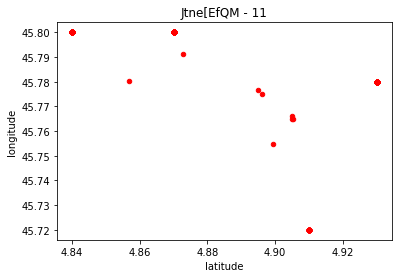

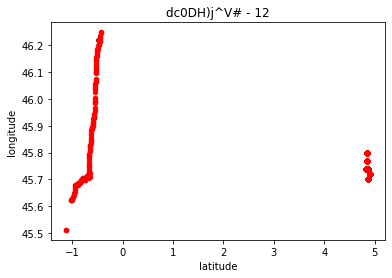

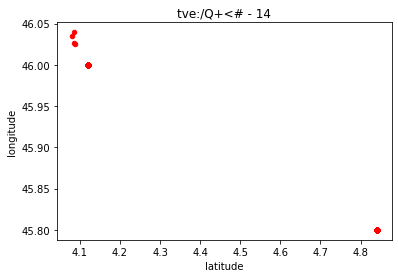

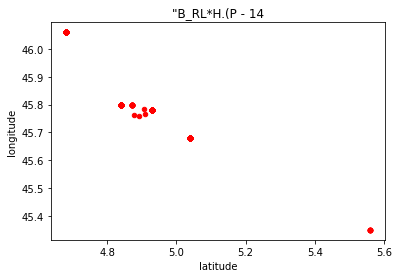

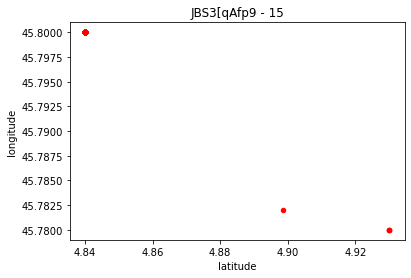

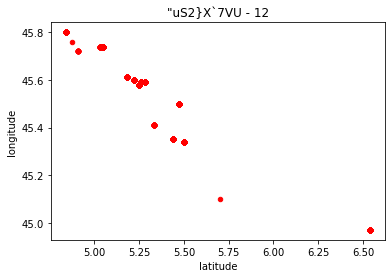

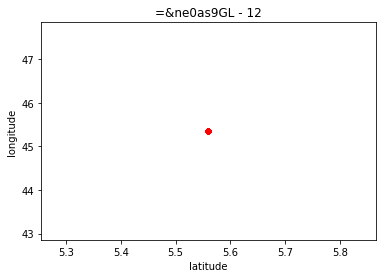

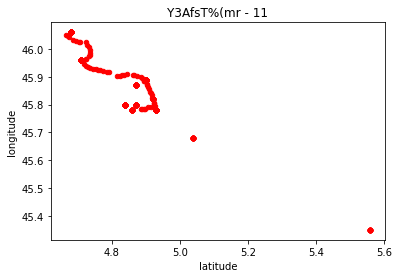

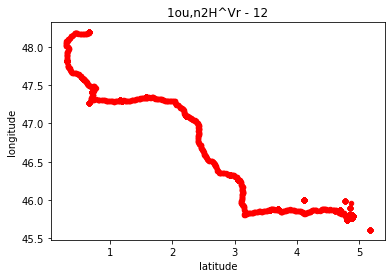

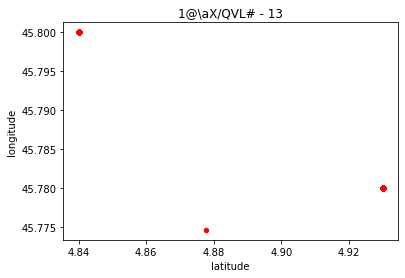

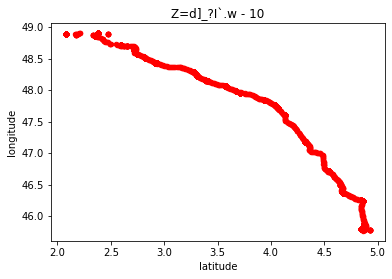

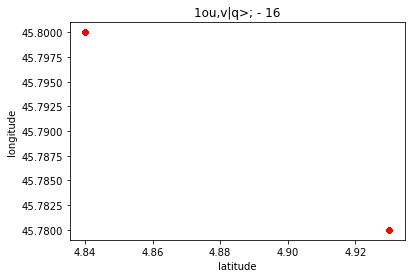

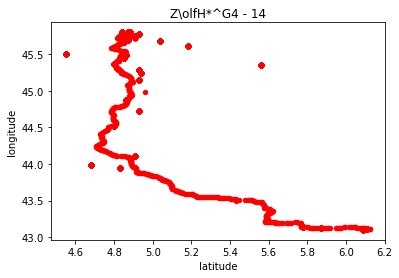

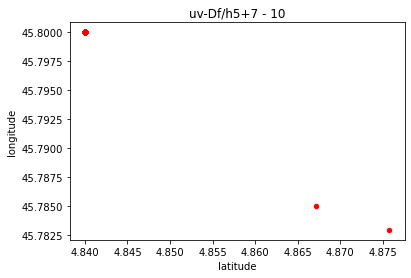

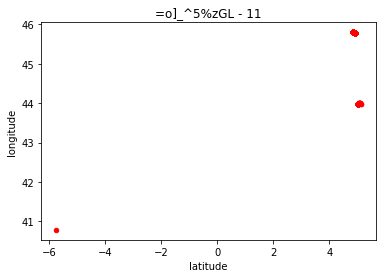

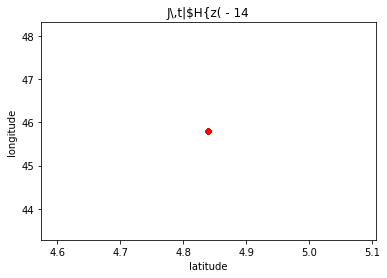

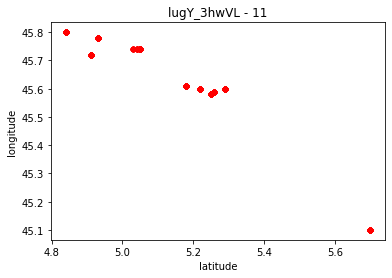

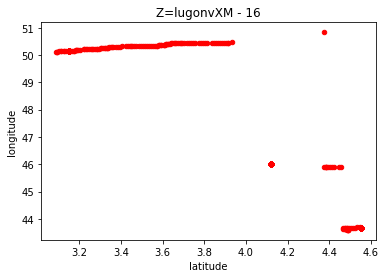

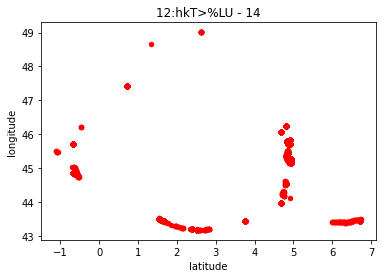

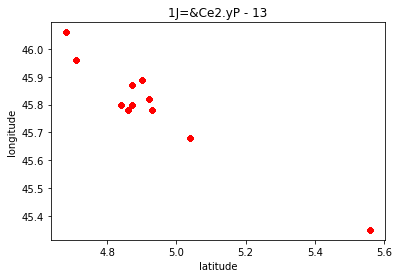

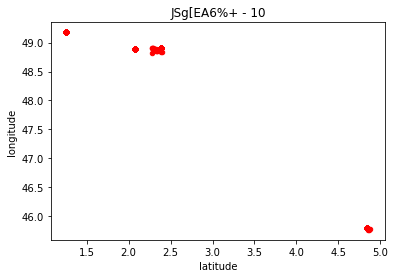

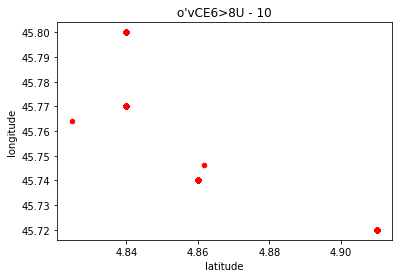

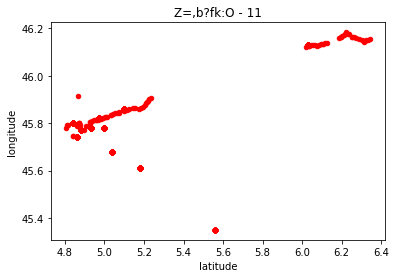

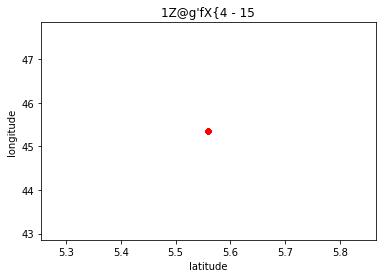

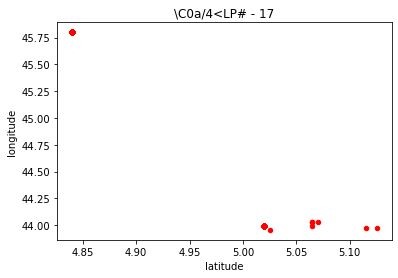

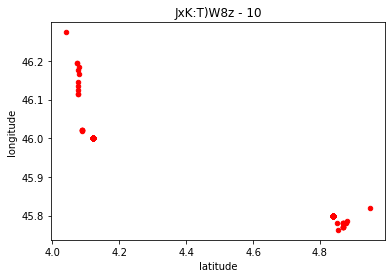

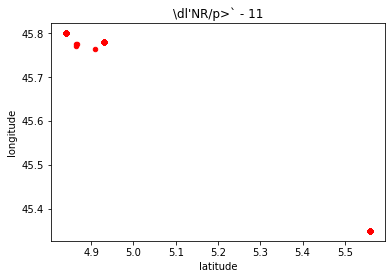

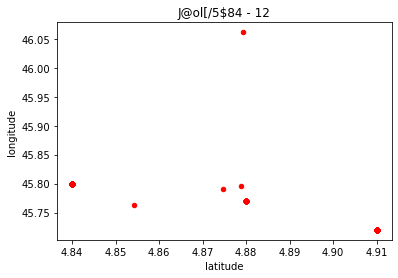

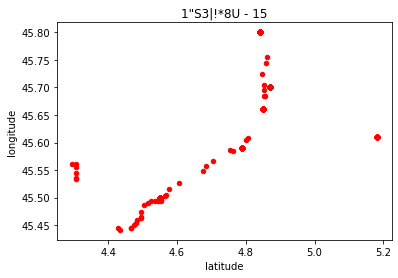

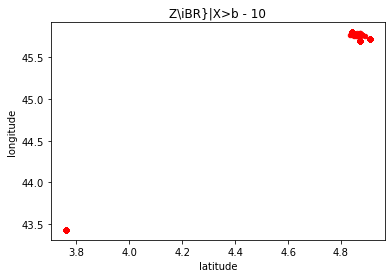

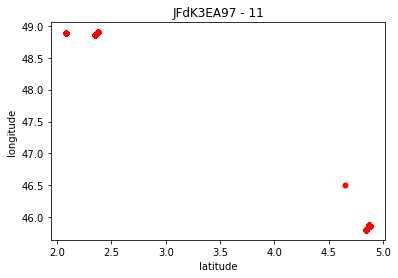

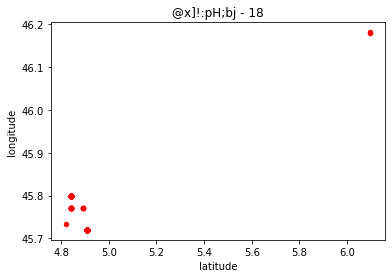

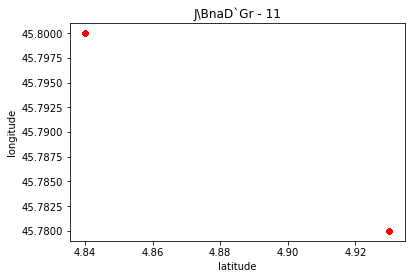

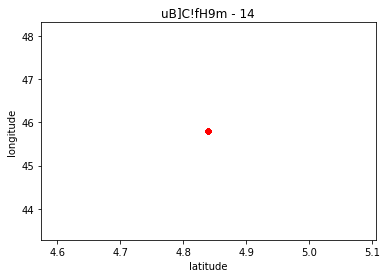

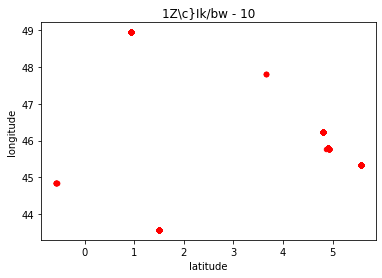

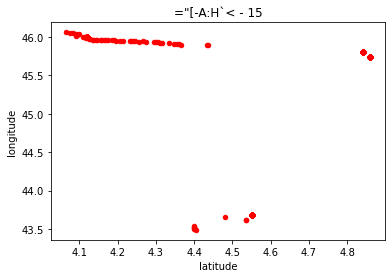

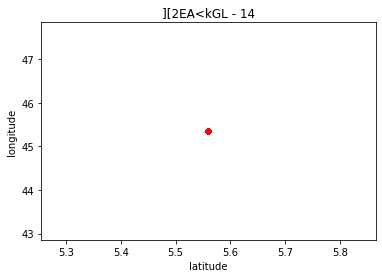

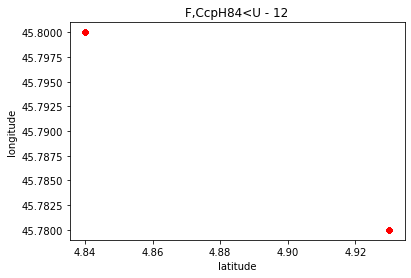

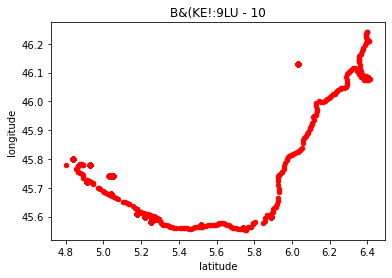

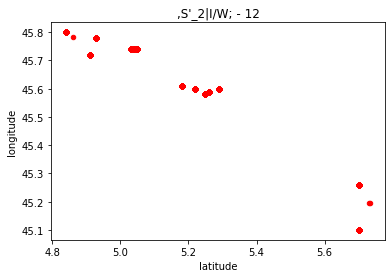

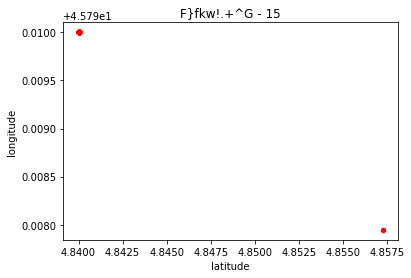

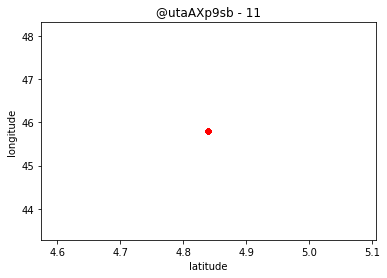

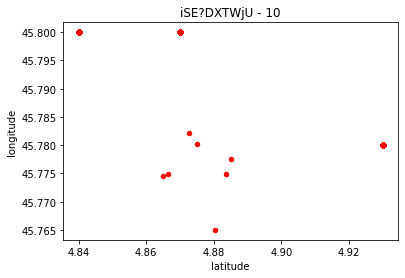

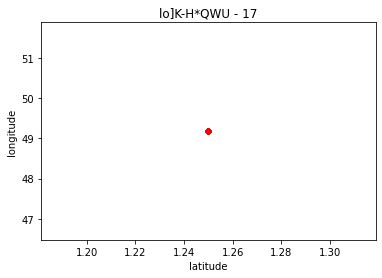

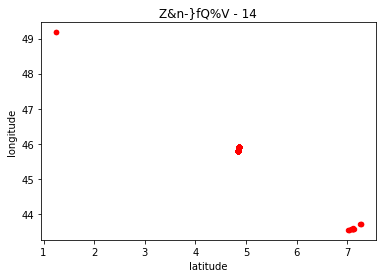

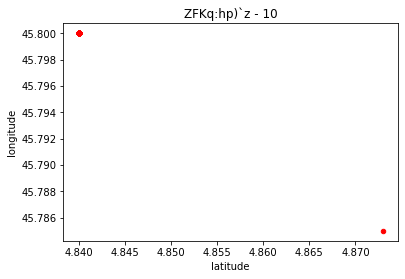

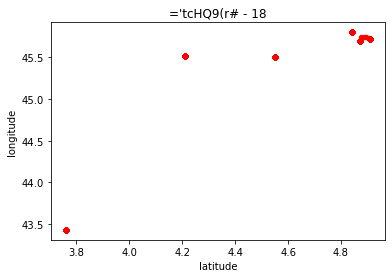

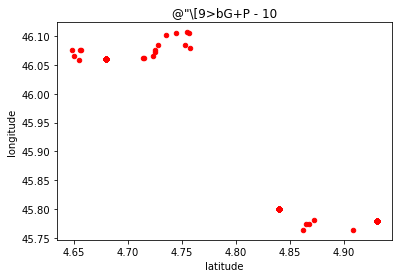

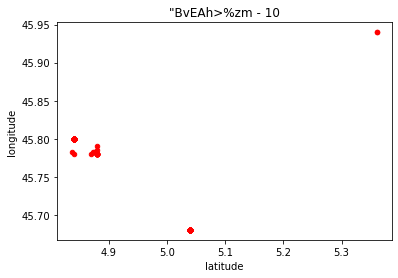

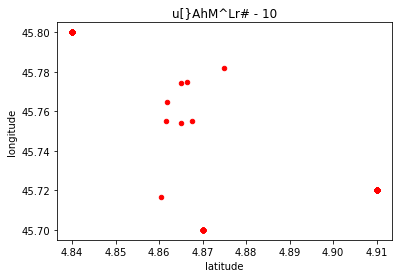

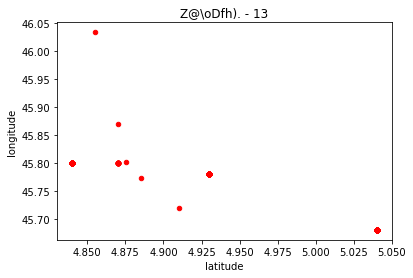

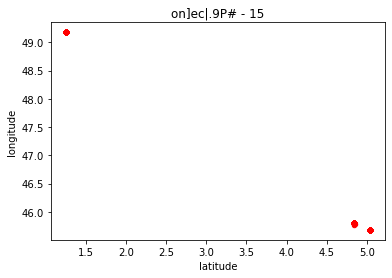

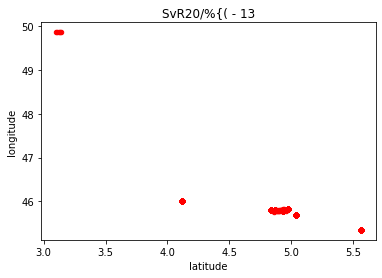

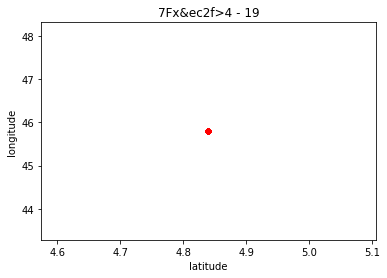

KeyboardInterrupt: 

In [4]:
import matplotlib.pyplot as plt
for i in list_id_anon: 
    for w in id_week_anon[i]:
        anon.loc[(anon['id'] == i) & (anon['week'] == w)].plot(kind='scatter',x='latitude',y='longitude',color='red')
        plt.title(f"{i} - {w}")
        plt.show()